## Importing Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import shap

### Converting CSV File into a DataFrame

In [84]:
df = pd.read_csv("final_dataset.csv")
df.head()

Price  Optimal_hr  Airline Cabin  Dept_city  Dept_date Dept_month  \
0   6159           5  Vistara    PE  New Delhi         20        Apr   
1   6159          11  Vistara    PE  New Delhi         20        Apr   
2   6159          12  Vistara    PE  New Delhi         20        Apr   
3   6159           8  Vistara    PE  New Delhi         20        Apr   
4   6159          13  Vistara    PE  New Delhi         20        Apr   

  arrival_city  stops layover_cities    Departure_Date      Arrival_Date  \
0      Mumbai       0       No Stops  20-04-2021 09:30  20-04-2021 11:40   
1      Mumbai       0       No Stops  20-04-2021 15:30  20-04-2021 17:40   
2      Mumbai       0       No Stops  20-04-2021 16:55  20-04-2021 19:05   
3      Mumbai       0       No Stops  20-04-2021 12:45  20-04-2021 15:00   
4      Mumbai       0       No Stops  20-04-2021 17:45  20-04-2021 20:05   

   duration  weekday day_name  dept_hours  arrival_hours Dept_flights_time  \
0     130.0        1  Tuesday           9             11    Morning_flight   
1     130.0        1  Tuesday          15             17  Afternoon_flight   
2     130.0        1  Tuesday          16             19    Evening_flight   
3     135.0        1  Tuesday          12             15  Afternoon_flight   
4     140.0        1  Tuesday          17             20    Evening_flight   

  arrival_flights_time  
0     Afternoon_flight  
1       Evening_flight  
2       Evening_flight  
3     Afternoon_flight  
4       Evening_flight

In [85]:
df.shape

(315985, 19)

#### Calculating No.of Airlines Used/Switched because as per the Data Airline column contains "," separator and after that adding a column to our DataFrame.

In [86]:
no_of_airlines = [] 
for i in range(df.shape[0]):
    if "," in df["Airline"].iloc[i]:
        no_of_airlines.append(2)
        
    else:
        no_of_airlines.append(1)
print(len(no_of_airlines))

315985


In [87]:
df["No_of_Airlines_used"] = no_of_airlines
print(df.head())

   Price  Optimal_hr  Airline Cabin  Dept_city  Dept_date Dept_month  \
0   6159           5  Vistara    PE  New Delhi         20        Apr   
1   6159          11  Vistara    PE  New Delhi         20        Apr   
2   6159          12  Vistara    PE  New Delhi         20        Apr   
3   6159           8  Vistara    PE  New Delhi         20        Apr   
4   6159          13  Vistara    PE  New Delhi         20        Apr   

  arrival_city  stops layover_cities    Departure_Date      Arrival_Date  \
0      Mumbai       0       No Stops  20-04-2021 09:30  20-04-2021 11:40   
1      Mumbai       0       No Stops  20-04-2021 15:30  20-04-2021 17:40   
2      Mumbai       0       No Stops  20-04-2021 16:55  20-04-2021 19:05   
3      Mumbai       0       No Stops  20-04-2021 12:45  20-04-2021 15:00   
4      Mumbai       0       No Stops  20-04-2021 17:45  20-04-2021 20:05   

   duration  weekday day_name  dept_hours  arrival_hours Dept_flights_time  \
0     130.0        1  Tuesday   

In [88]:
df["No_of_Airlines_used"].describe()

count    315985.000000
mean          1.088039
std           0.283352
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: No_of_Airlines_used, dtype: float64

##### If Airline column contains"," as separator then splitting that Airline column otherwise marking a row as "No connecting Flights". Added new column to DataFrame "No connecting Airline".

In [89]:
Airline=[]
connecting_flight_Airline=[]
for i in df["Airline"]:
    if "," in i:
        connecting_flight_Airline.append(i.split(",")[1])
        Airline.append(i.split(",")[0])
    else:
        Airline.append(i)
        connecting_flight_Airline.append("No connecting airline")

df["Airline"]=Airline
df["connecting_flight_Airline"]=connecting_flight_Airline

In [90]:
df.isnull().sum()

Price                        0
Optimal_hr                   0
Airline                      0
Cabin                        0
Dept_city                    0
Dept_date                    0
Dept_month                   0
arrival_city                 0
stops                        0
layover_cities               0
Departure_Date               0
Arrival_Date                 0
duration                     0
weekday                      0
day_name                     0
dept_hours                   0
arrival_hours                0
Dept_flights_time            0
arrival_flights_time         0
No_of_Airlines_used          0
connecting_flight_Airline    0
dtype: int64

In [91]:
df.columns

Index(['Price', 'Optimal_hr', 'Airline', 'Cabin', 'Dept_city', 'Dept_date',
       'Dept_month', 'arrival_city', 'stops', 'layover_cities',
       'Departure_Date', 'Arrival_Date', 'duration', 'weekday', 'day_name',
       'dept_hours', 'arrival_hours', 'Dept_flights_time',
       'arrival_flights_time', 'No_of_Airlines_used',
       'connecting_flight_Airline'],
      dtype='object')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315985 entries, 0 to 315984
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Price                      315985 non-null  int64  
 1   Optimal_hr                 315985 non-null  int64  
 2   Airline                    315985 non-null  object 
 3   Cabin                      315985 non-null  object 
 4   Dept_city                  315985 non-null  object 
 5   Dept_date                  315985 non-null  int64  
 6   Dept_month                 315985 non-null  object 
 7   arrival_city               315985 non-null  object 
 8   stops                      315985 non-null  int64  
 9   layover_cities             315985 non-null  object 
 10  Departure_Date             315985 non-null  object 
 11  Arrival_Date               315985 non-null  object 
 12  duration                   315985 non-null  float64
 13  weekday                    31

#### Dropping Out unnecessary columns from the DataFrame.

In [93]:
df.drop(columns=["Dept_city","arrival_city","layover_cities","Departure_Date","Arrival_Date","day_name","arrival_hours","arrival_flights_time"],inplace=True,axis=1)

#### Calculating Biserial Correlation Coefficient wrt Price Column

In [94]:
for i in df.columns:
    if df[i].dtype == "int64":
        key = i
        value = df[i].corr(df['Price'])
        print(f"Keys: {i} Correlation Coefficient: {value}")
    

Keys: Price Correlation Coefficient: 1.0
Keys: Optimal_hr Correlation Coefficient: 0.08628230746692485
Keys: Dept_date Correlation Coefficient: -0.05808091302141167
Keys: stops Correlation Coefficient: 0.47495671897779745
Keys: weekday Correlation Coefficient: 0.01812522078971293
Keys: dept_hours Correlation Coefficient: 0.09250031969200241
Keys: No_of_Airlines_used Correlation Coefficient: -0.013970558298925977


In [95]:
#Point Biserial Correlation
print(df.corr())

                        Price  Optimal_hr  Dept_date     stops  duration  \
Price                1.000000    0.086282  -0.058081  0.474957  0.414052   
Optimal_hr           0.086282    1.000000  -0.021046  0.020322  0.206079   
Dept_date           -0.058081   -0.021046   1.000000  0.035386  0.042227   
stops                0.474957    0.020322   0.035386  1.000000  0.572703   
duration             0.414052    0.206079   0.042227  0.572703  1.000000   
weekday              0.018125   -0.007519  -0.037174 -0.001342 -0.000330   
dept_hours           0.092500    0.849565  -0.001811  0.023995  0.213829   
No_of_Airlines_used -0.013971   -0.120842   0.055247  0.244236  0.085970   

                      weekday  dept_hours  No_of_Airlines_used  
Price                0.018125    0.092500            -0.013971  
Optimal_hr          -0.007519    0.849565            -0.120842  
Dept_date           -0.037174   -0.001811             0.055247  
stops               -0.001342    0.023995             0

In [96]:
print("The Data set has {} rows and {} columns\n".format(df.shape[0],df.shape[1]))


The Data set has 315985 rows and 13 columns



In [97]:
#To check NULL values
df.isnull().sum()

Price                        0
Optimal_hr                   0
Airline                      0
Cabin                        0
Dept_date                    0
Dept_month                   0
stops                        0
duration                     0
weekday                      0
dept_hours                   0
Dept_flights_time            0
No_of_Airlines_used          0
connecting_flight_Airline    0
dtype: int64

In [98]:
df["Airline"].value_counts()

IndiGo               132232
Air India             79346
Vistara               51553
Go Air                23114
Spicejet              18162
AirAsia               11455
flybig                   68
TruJet                   52
Air India Express         3
Name: Airline, dtype: int64

#### Making a list for the Row Index values that contains the Unnecessary Airline and dropping those indexes out from the DataFrame.

In [99]:
l1 = []
l1.append(df[df["Airline"] == "flybig"].index)
l1.append(df[df["Airline"] == "TruJet"].index)
l1.append(df[df["Airline"] == "Air India Express"].index)
#print(l1)
l2 = []
for i in l1:
    for j in i:
        l2.append(j)
l2

[90426,
 90427,
 90428,
 90435,
 90501,
 90562,
 91558,
 91559,
 91560,
 91561,
 91563,
 91640,
 91706,
 93849,
 93851,
 93853,
 93854,
 93857,
 93920,
 96099,
 96101,
 96102,
 96105,
 96174,
 97221,
 97222,
 97227,
 97287,
 98287,
 98288,
 98291,
 98357,
 98359,
 98360,
 98430,
 99410,
 99411,
 99490,
 99491,
 99493,
 99562,
 101650,
 101652,
 101655,
 101656,
 103732,
 103734,
 103735,
 103738,
 103806,
 104810,
 104811,
 104814,
 104882,
 105899,
 105900,
 105968,
 141533,
 142909,
 145683,
 148324,
 149782,
 151201,
 152568,
 155283,
 157956,
 159295,
 160823,
 16695,
 16915,
 17476,
 17820,
 18362,
 19742,
 20597,
 21132,
 22263,
 22549,
 23965,
 25087,
 25371,
 26041,
 27439,
 28790,
 29896,
 30164,
 166238,
 166508,
 167596,
 167859,
 167866,
 168952,
 169219,
 169226,
 170587,
 171955,
 173325,
 174432,
 174699,
 174706,
 175806,
 176069,
 176076,
 177164,
 177427,
 177434,
 178563,
 178840,
 178847,
 180260,
 181668,
 183068,
 184215,
 184493,
 184500,
 185643,
 185923,
 18705

In [100]:
df.drop(l2, inplace=True)

In [101]:
df["Airline"].value_counts()

IndiGo       132232
Air India     79346
Vistara       51553
Go Air        23114
Spicejet      18162
AirAsia       11455
Name: Airline, dtype: int64

In [102]:
df["No_of_Airlines_used"].describe()

count    315862.000000
mean          1.087924
std           0.283185
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: No_of_Airlines_used, dtype: float64

#### Using OneHotEncoding to transform the data of certain columns.

In [103]:
le1 = OneHotEncoder()
airline_arr = le1.fit_transform(df[["Airline"]]).toarray()
print(airline_arr.shape)


(315862, 6)


In [104]:
df["Airline"].value_counts()

IndiGo       132232
Air India     79346
Vistara       51553
Go Air        23114
Spicejet      18162
AirAsia       11455
Name: Airline, dtype: int64

In [105]:
airl_indigo = airline_arr[:, 0]
airl_air_india = airline_arr[:, 1]
airl_air_vistara = airline_arr[:, 2]
airl_go_air = airline_arr[:, 3]
airl_spicejet = airline_arr[:, 4]
airl_airasia = airline_arr[:, 5]

In [106]:
print(airl_indigo[0])
print(airl_air_india[0])
print(airl_air_vistara[0])
print(airl_go_air[0])
print(airl_spicejet[0])
print(airl_airasia[0])

0.0
0.0
0.0
0.0
0.0
1.0


In [107]:
data = pd.DataFrame(airl_indigo,columns=["Airline Indigo"])
data["Airline Air India"] = airl_air_india
data["Airline Air Vistara"] = airl_air_vistara
data["Airline Go Air"] = airl_go_air
data["Airline Spicejet"] = airl_spicejet
data["Airline AirAsia"] = airl_airasia


In [108]:
data

Airline Indigo  Airline Air India  Airline Air Vistara  \
0                  0.0                0.0                  0.0   
1                  0.0                0.0                  0.0   
2                  0.0                0.0                  0.0   
3                  0.0                0.0                  0.0   
4                  0.0                0.0                  0.0   
...                ...                ...                  ...   
315857             0.0                0.0                  0.0   
315858             0.0                0.0                  0.0   
315859             0.0                0.0                  0.0   
315860             0.0                0.0                  0.0   
315861             0.0                0.0                  0.0   

        Airline Go Air  Airline Spicejet  Airline AirAsia  
0                  0.0               0.0              1.0  
1                  0.0               0.0              1.0  
2                  0.0               0.0              1.0  
3                  0.0               0.0              1.0  
4                  0.0               0.0              1.0  
...                ...               ...              ...  
315857             0.0               0.0              1.0  
315858             0.0               0.0              1.0  
315859             0.0               0.0              1.0  
315860             0.0               0.0              1.0  
315861             0.0               0.0              1.0  

[315862 rows x 6 columns]

In [109]:
cabin_arr = le1.fit_transform(df[["Cabin"]]).toarray()
print(cabin_arr.shape)

(315862, 3)


In [110]:
df["Cabin"].value_counts()

E     185866
B     113127
PE     16869
Name: Cabin, dtype: int64

In [111]:
cabin_e = cabin_arr[:, 0]
cabin_b = cabin_arr[:, 1]
cabin_pe = cabin_arr[:, 2]

data["Cabin Economy"] = cabin_e
data["Cabin Business"] = cabin_b
data["Cabin Premium Economy"] = cabin_pe


In [112]:
dept_month_arr = le1.fit_transform(df[["Dept_month"]]).toarray()
print(dept_month_arr.shape)

(315862, 2)


In [113]:
df["Dept_month"].value_counts()

Apr    165575
May    150287
Name: Dept_month, dtype: int64

In [114]:
dept_month_april = dept_month_arr[:, 0]
dept_month_may = dept_month_arr[:, 1]

data["Dept Month April"] = dept_month_april
data["Dept Month May"] = dept_month_may

In [115]:
dept_flights_time_arr = le1.fit_transform(df[["Dept_flights_time"]]).toarray()
print(dept_flights_time_arr.shape)

(315862, 4)


In [116]:
df["Dept_flights_time"].value_counts()

Morning_flight      124439
Afternoon_flight     91156
Evening_flight       69212
Night_flight         31055
Name: Dept_flights_time, dtype: int64

In [117]:
Dept_Morning_Flight = dept_flights_time_arr[:, 0]
Dept_Afternoon_Flight = dept_flights_time_arr[:, 1]
Dept_Evening_Flight = dept_flights_time_arr[:, 2]
Dept_Night_Flight = dept_flights_time_arr[:, 3]

data["Dept_Morning_Flight"] = Dept_Morning_Flight
data["Dept_Afternoon_Flight"] = Dept_Afternoon_Flight
data["Dept_Evening_Flight"] = Dept_Evening_Flight
data["Dept_Night_Flight"] = Dept_Night_Flight

In [118]:
connecting_flight_Airline_arr = le1.fit_transform(df[["connecting_flight_Airline"]]).toarray()
print(connecting_flight_Airline_arr.shape)

(315862, 8)


In [119]:
df["connecting_flight_Airline"].value_counts()

No connecting airline    288090
 IndiGo                   11062
 Air India                 5696
 Vistara                   3626
 Go Air                    3543
 Spicejet                  1973
 AirAsia                   1866
 Air India Express            6
Name: connecting_flight_Airline, dtype: int64

In [120]:
No_connecting_airline = connecting_flight_Airline_arr[:, 0]
Indigo = connecting_flight_Airline_arr[:, 1]
Air_India = connecting_flight_Airline_arr[:, 2]
Vistara = connecting_flight_Airline_arr[:, 3]
Go_Air = connecting_flight_Airline_arr[:, 4]
Spicejet = connecting_flight_Airline_arr[:, 5]
AirAsia = connecting_flight_Airline_arr[:, 6]
Air_India_Express = connecting_flight_Airline_arr[:, 7]

data["No Connecting airline"] = No_connecting_airline
data["Connecting Indigo"] = Indigo
data["Connecting Air India"] = Air_India
data["Connecting Vistara"] = Vistara
data["Connecting Go Air"] = Go_Air
data["Connecting Spicejet"] = Spicejet
data["Connecting AirAsia"] = AirAsia
data["Air India Express"] = Air_India_Express

In [121]:
data

Airline Indigo  Airline Air India  Airline Air Vistara  \
0                  0.0                0.0                  0.0   
1                  0.0                0.0                  0.0   
2                  0.0                0.0                  0.0   
3                  0.0                0.0                  0.0   
4                  0.0                0.0                  0.0   
...                ...                ...                  ...   
315857             0.0                0.0                  0.0   
315858             0.0                0.0                  0.0   
315859             0.0                0.0                  0.0   
315860             0.0                0.0                  0.0   
315861             0.0                0.0                  0.0   

        Airline Go Air  Airline Spicejet  Airline AirAsia  Cabin Economy  \
0                  0.0               0.0              1.0            0.0   
1                  0.0               0.0              1.0            0.0   
2                  0.0               0.0              1.0            0.0   
3                  0.0               0.0              1.0            0.0   
4                  0.0               0.0              1.0            0.0   
...                ...               ...              ...            ...   
315857             0.0               0.0              1.0            0.0   
315858             0.0               0.0              1.0            0.0   
315859             0.0               0.0              1.0            0.0   
315860             0.0               0.0              1.0            0.0   
315861             0.0               0.0              1.0            0.0   

        Cabin Business  Cabin Premium Economy  Dept Month April  ...  \
0                  0.0                    1.0               1.0  ...   
1                  0.0                    1.0               1.0  ...   
2                  0.0                    1.0               1.0  ...   
3                  0.0                    1.0               1.0  ...   
4                  0.0                    1.0               1.0  ...   
...                ...                    ...               ...  ...   
315857             0.0                    1.0               0.0  ...   
315858             0.0                    1.0               0.0  ...   
315859             0.0                    1.0               0.0  ...   
315860             0.0                    1.0               0.0  ...   
315861             0.0                    1.0               0.0  ...   

        Dept_Evening_Flight  Dept_Night_Flight  No Connecting airline  \
0                       1.0                0.0                    0.0   
1                       0.0                0.0                    0.0   
2                       0.0                0.0                    0.0   
3                       0.0                0.0                    0.0   
4                       0.0                0.0                    0.0   
...                     ...                ...                    ...   
315857                  1.0                0.0                    0.0   
315858                  1.0                0.0                    0.0   
315859                  0.0                0.0                    0.0   
315860                  0.0                0.0                    0.0   
315861                  1.0                0.0                    0.0   

        Connecting Indigo  Connecting Air India  Connecting Vistara  \
0                     0.0                   0.0                 0.0   
1                     0.0                   0.0                 0.0   
2                     0.0                   0.0                 0.0   
3                     0.0                   0.0                 0.0   
4                     0.0                   0.0                 0.0   
...                   ...                   ...                 ...   
315857                0.0                   0.0                

#### Appending the "Data Dataframe" to main DataFrame.

In [122]:
df1 = pd.concat([df, data], axis = 1, join = "inner")
print(df1.shape)

(315739, 36)


In [123]:
df1.head()

Price  Optimal_hr  Airline Cabin  Dept_date Dept_month  stops  duration  \
0   6159           5  Vistara    PE         20        Apr      0     130.0   
1   6159          11  Vistara    PE         20        Apr      0     130.0   
2   6159          12  Vistara    PE         20        Apr      0     130.0   
3   6159           8  Vistara    PE         20        Apr      0     135.0   
4   6159          13  Vistara    PE         20        Apr      0     140.0   

   weekday  dept_hours  ... Dept_Evening_Flight  Dept_Night_Flight  \
0        1           9  ...                 1.0                0.0   
1        1          15  ...                 0.0                0.0   
2        1          16  ...                 0.0                0.0   
3        1          12  ...                 0.0                0.0   
4        1          17  ...                 0.0                0.0   

  No Connecting airline  Connecting Indigo  Connecting Air India  \
0                   0.0                0.0                   0.0   
1                   0.0                0.0                   0.0   
2                   0.0                0.0                   0.0   
3                   0.0                0.0                   0.0   
4                   0.0                0.0                   0.0   

   Connecting Vistara  Connecting Go Air  Connecting Spicejet  \
0                 0.0                0.0                  0.0   
1                 0.0                0.0                  0.0   
2                 0.0                0.0                  0.0   
3                 0.0                0.0                  0.0   
4                 0.0                0.0                  0.0   

   Connecting AirAsia  Air India Express  
0                 0.0                1.0  
1                 0.0                1.0  
2                 0.0                1.0  
3                 0.0                1.0  
4                 0.0                1.0  

[5 rows x 36 columns]

In [124]:
df1.drop(columns = ["Airline", "Cabin", "Dept_month", "Dept_flights_time", "connecting_flight_Airline"], axis = 1, inplace = True)

In [125]:
df1.shape

(315739, 31)

In [126]:
df1.isnull().sum()

Price                    0
Optimal_hr               0
Dept_date                0
stops                    0
duration                 0
weekday                  0
dept_hours               0
No_of_Airlines_used      0
Airline Indigo           0
Airline Air India        0
Airline Air Vistara      0
Airline Go Air           0
Airline Spicejet         0
Airline AirAsia          0
Cabin Economy            0
Cabin Business           0
Cabin Premium Economy    0
Dept Month April         0
Dept Month May           0
Dept_Morning_Flight      0
Dept_Afternoon_Flight    0
Dept_Evening_Flight      0
Dept_Night_Flight        0
No Connecting airline    0
Connecting Indigo        0
Connecting Air India     0
Connecting Vistara       0
Connecting Go Air        0
Connecting Spicejet      0
Connecting AirAsia       0
Air India Express        0
dtype: int64

In [127]:
df1["stops"]

0         0
1         0
2         0
3         0
4         0
         ..
315857    1
315858    1
315859    1
315860    1
315861    1
Name: stops, Length: 315739, dtype: int64

In [128]:
df1.isnull().sum()

Price                    0
Optimal_hr               0
Dept_date                0
stops                    0
duration                 0
weekday                  0
dept_hours               0
No_of_Airlines_used      0
Airline Indigo           0
Airline Air India        0
Airline Air Vistara      0
Airline Go Air           0
Airline Spicejet         0
Airline AirAsia          0
Cabin Economy            0
Cabin Business           0
Cabin Premium Economy    0
Dept Month April         0
Dept Month May           0
Dept_Morning_Flight      0
Dept_Afternoon_Flight    0
Dept_Evening_Flight      0
Dept_Night_Flight        0
No Connecting airline    0
Connecting Indigo        0
Connecting Air India     0
Connecting Vistara       0
Connecting Go Air        0
Connecting Spicejet      0
Connecting AirAsia       0
Air India Express        0
dtype: int64

###### Various Plots to observe the trend of Features:

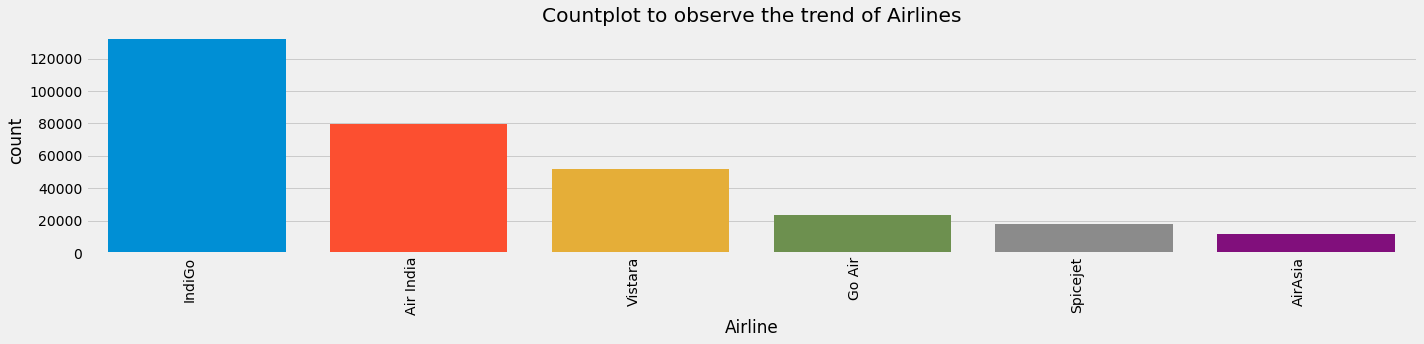

In [129]:
plt.figure(figsize=(20,5))
plt.title("Countplot to observe the trend of Airlines")
ax = sns.countplot(x = "Airline", data = df, saturation = 1.75, order=df["Airline"].value_counts(ascending=False).index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  #it will rotate text on x axis
plt.tight_layout()
plt.show()


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


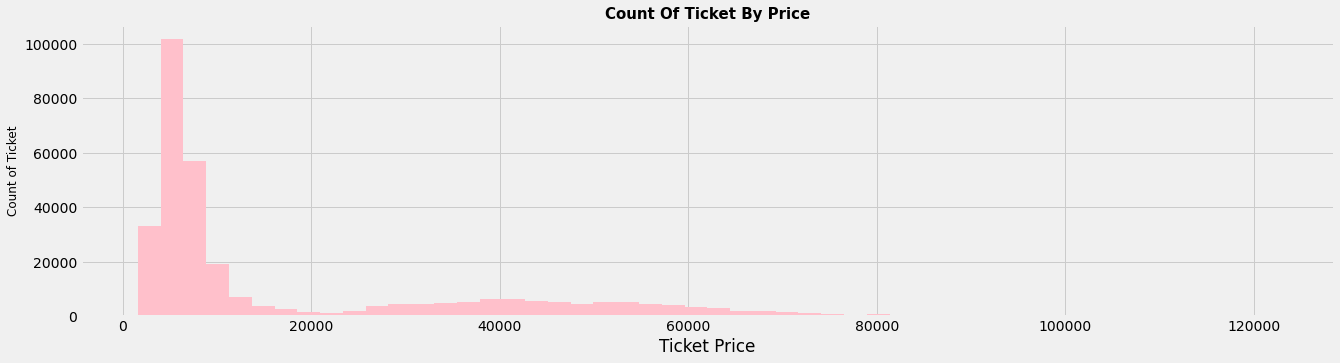

In [130]:
plt.figure(figsize=(20,5))
ax = sns.distplot(df1['Price'], kde=False, color='pink', hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')
ax.set_xlabel('Ticket Price')
ax.set_ylabel('Count of Ticket',size=12)
ax.set_title('Count Of Ticket By Price',size=15,weight="bold")
plt.show()

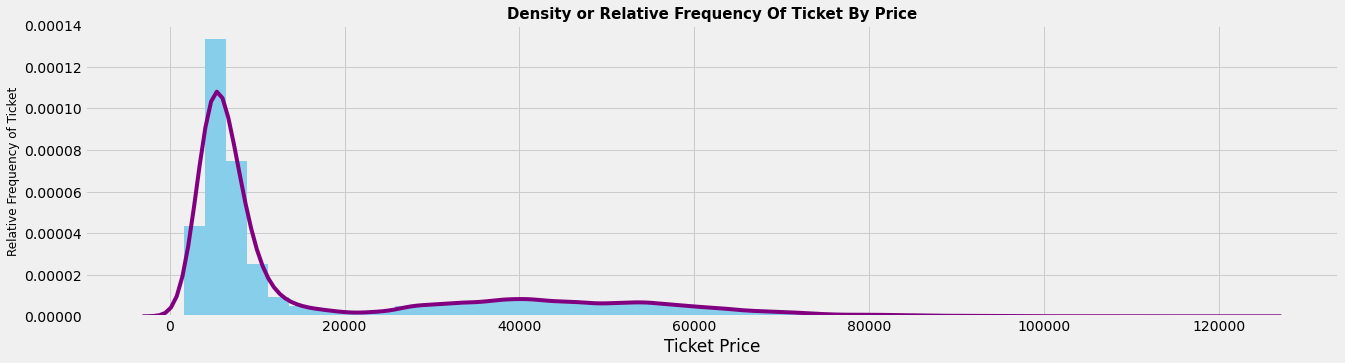

In [131]:
plt.figure(figsize=(20,5))
ax = sns.distplot(df1['Price'], kde=True, color='purple', hist_kws={"linewidth": 15,'alpha':1, "color": "skyblue"})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')
ax.set_xlabel('Ticket Price')
ax.set_ylabel('Relative Frequency of Ticket',size=12)
ax.set_title('Density or Relative Frequency Of Ticket By Price',size=15,weight="bold")
plt.show()

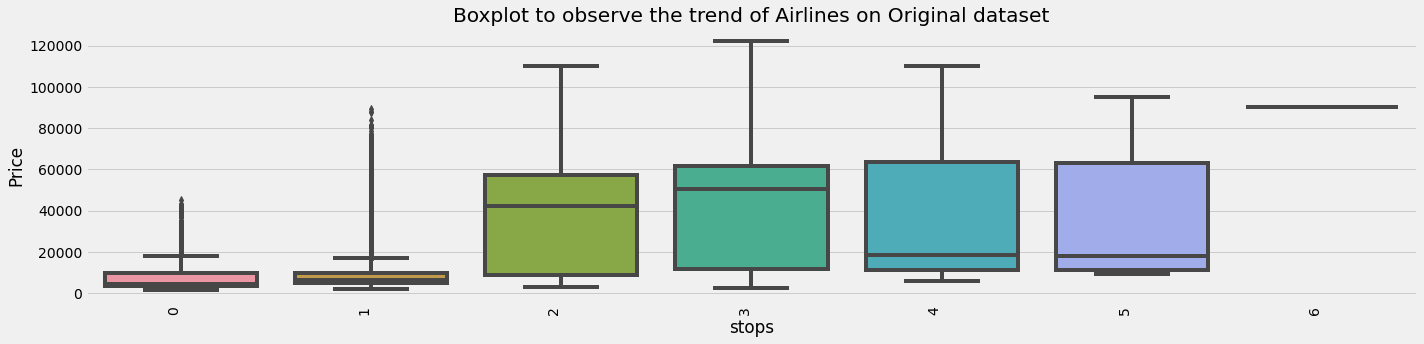

In [132]:
plt.figure(figsize=(20,5))
plt.title("Boxplot to observe the trend of Airlines on Original dataset")
ax = sns.boxplot(x = "stops", y = "Price", data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "right")  #it will rotate text on x axis
plt.tight_layout()
plt.show()

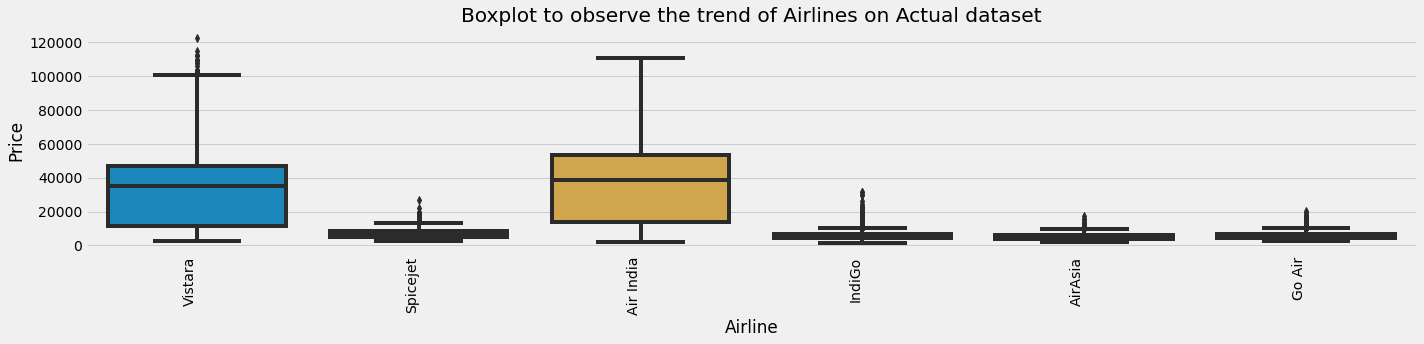

In [133]:
plt.figure(figsize=(20,5))
plt.title("Boxplot to observe the trend of Airlines on Actual dataset")
ax = sns.boxplot(x = "Airline", y = "Price", data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  #it will rotate text on x axis
plt.tight_layout()
plt.show()

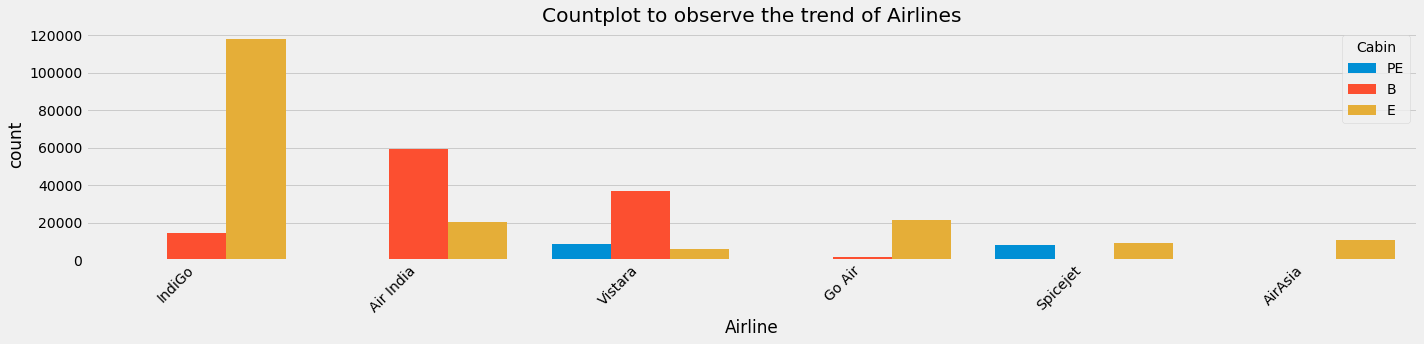

In [134]:
plt.figure(figsize=(20,5))
plt.title("Countplot to observe the trend of Airlines")
ax = sns.countplot(x = "Airline", data = df, saturation = 1.75, order=df["Airline"].value_counts(ascending=False).index, hue = 'Cabin')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  #it will rotate text on x axis
plt.tight_layout()
plt.show()

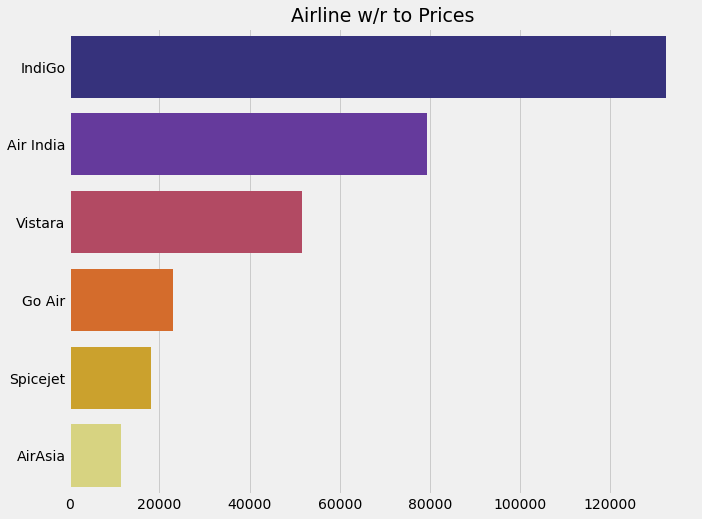

In [135]:
#Compare the each category in categorical column with the "Price columns" 
#Get the flights to compare with the Price column
top = df["Airline"].value_counts()[:20]
plt.figure(figsize=(10,8))
gv = sns.barplot(y = top.index, x = top.values,data = df, palette = "CMRmap")
plt.title("Airline w/r to Prices",fontsize = 19)
plt.show()

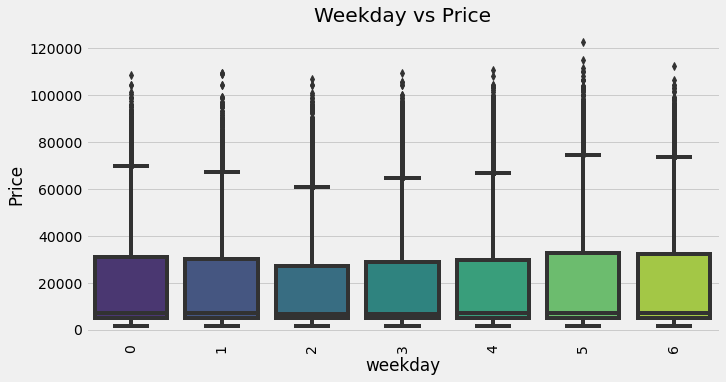

In [136]:
plt.style.use('fivethirtyeight')
sns.catplot(x = 'weekday', y = 'Price', data = df1, palette = "viridis", aspect = 2, height = 5, kind = 'box')
plt.title('Weekday ' + 'vs Price')
plt.xticks(rotation=90)
plt.show()

In [137]:
#Check Stops and dept flight time with the price
gv=df.groupby(["stops","Dept_flights_time"])[["Price"]].mean()
print(f"The flight price of the '{gv['Price'].idxmax()[1]}' is comparitvely higher with the No stops of '{gv['Price'].idxmax()[0]}' and the flight price is '{gv['Price'].max()}'",'\n')
print(f"The flight price of the '{gv['Price'].idxmin()[1]}' is comparitvely lower and the No of stops are '{gv['Price'].idxmin()[0]}' and the flight price is '{gv['Price'].min()}'")

The flight price of the 'Afternoon_flight' is comparitvely higher with the No stops of '6' and the flight price is '90117.0' 

The flight price of the 'Night_flight' is comparitvely lower and the No of stops are '0' and the flight price is '7591.214638157895'


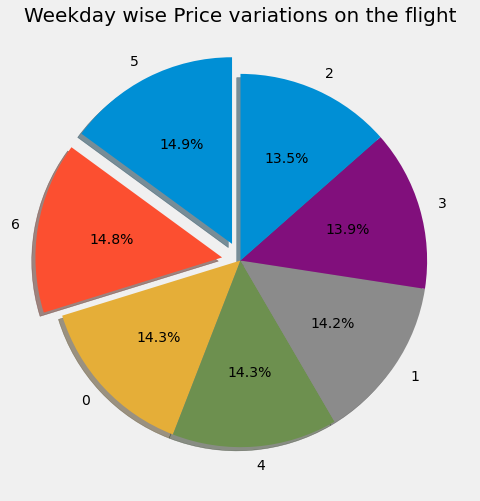

In [138]:
#Check day wise price of the flight
day_wis=df1.groupby("weekday")["Price"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,8))
plt.pie(day_wis.values,labels=day_wis.index,shadow=True,startangle=90,autopct="%1.1f%%",explode=[0.1,0.1,0,0,0,0,0])
plt.title("Weekday wise Price variations on the flight",fontsize=20)
plt.show()

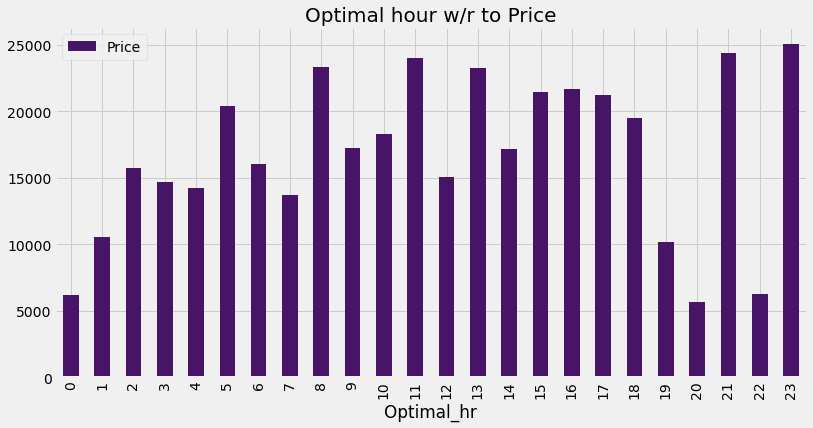

In [139]:
vg=df.groupby("Optimal_hr")[["Price"]].mean()
vg.plot.bar(color=sns.color_palette("viridis",18),figsize=(12,6))
plt.title("Optimal hour w/r to Price",fontsize=20)
plt.show()

In [140]:
df.columns

Index(['Price', 'Optimal_hr', 'Airline', 'Cabin', 'Dept_date', 'Dept_month',
       'stops', 'duration', 'weekday', 'dept_hours', 'Dept_flights_time',
       'No_of_Airlines_used', 'connecting_flight_Airline'],
      dtype='object')

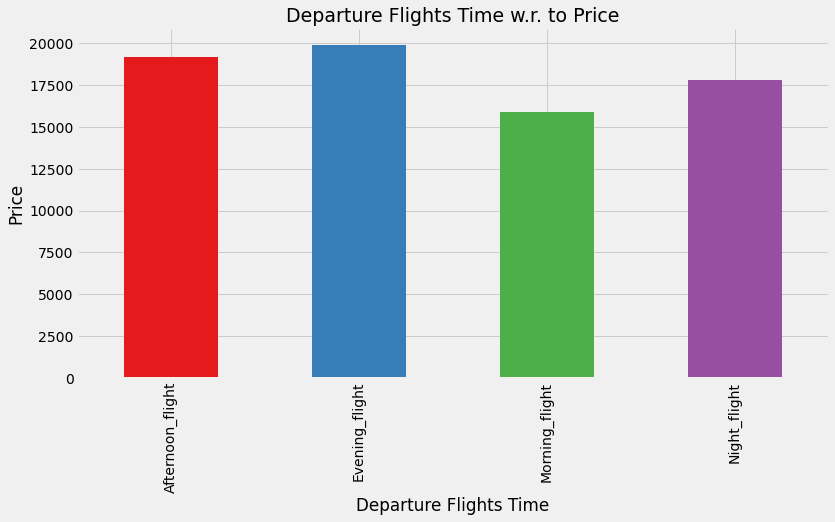

In [141]:
#Get the which dept city has highest flight price
arr1=df.groupby("Dept_flights_time")["Price"].mean()
arr1.plot.bar(color=sns.color_palette("Set1",8),figsize=(12,6))
plt.title("Departure Flights Time w.r. to Price",fontsize=19)
plt.ylabel("Price")
plt.xlabel("Departure Flights Time")
plt.show()

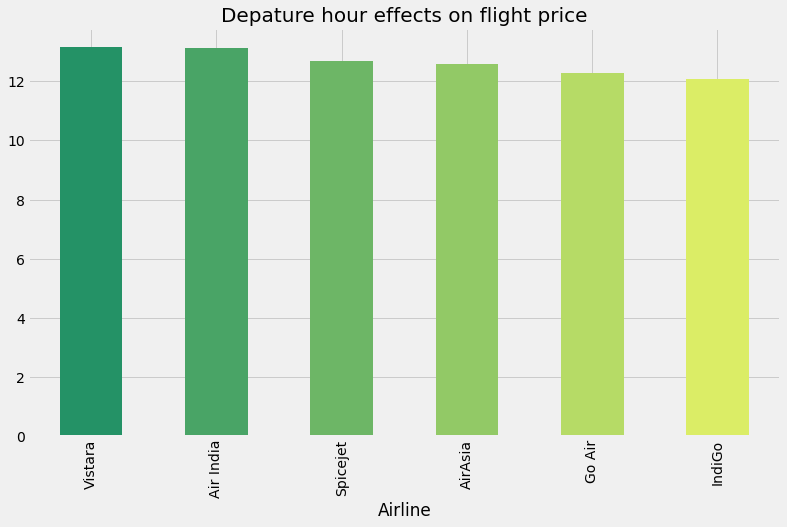

In [142]:
#Check the How many hours if a flight take to departure will affect on a price
debt=df.groupby("Airline")["dept_hours"].mean().sort_values(ascending=False)
debt.plot.bar(color=sns.color_palette("summer"),figsize=(12,7))
plt.title("Depature hour effects on flight price",fontsize=20)
plt.show()

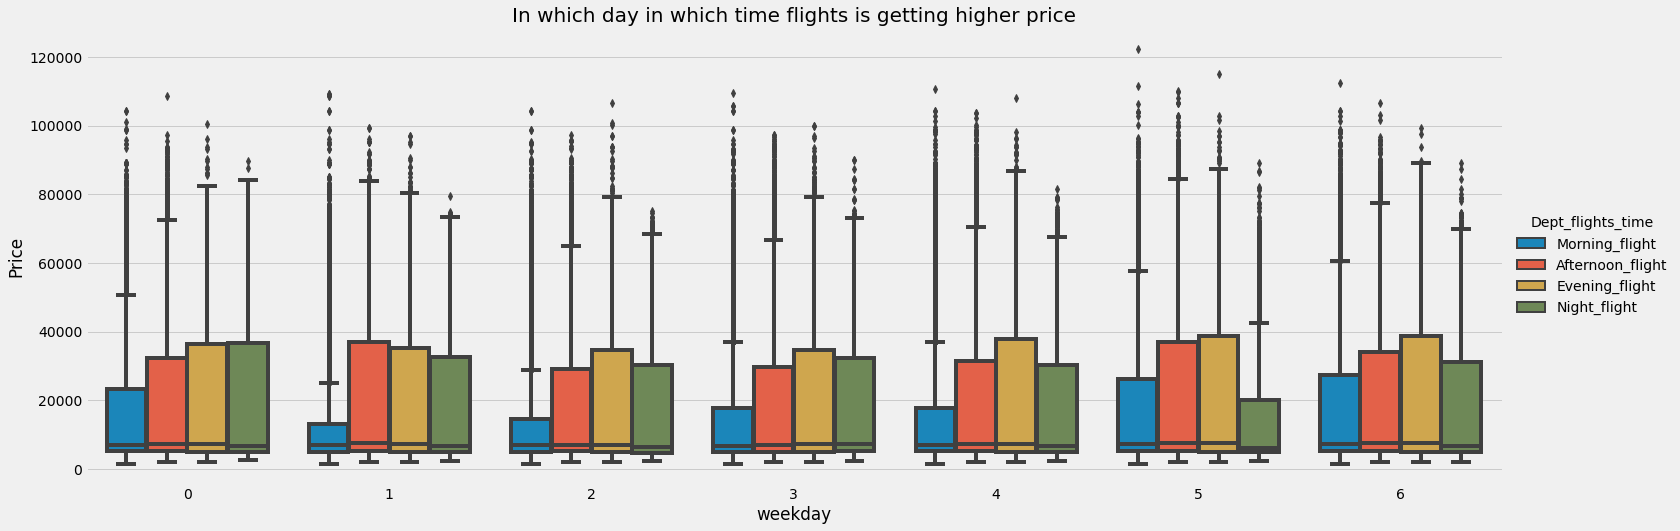

In [143]:
#Check In which day in which flight is getting higher price
sns.catplot(x='weekday',y='Price',hue='Dept_flights_time',kind='box',data=df,height=7,aspect=3)
plt.title("In which day in which time flights is getting higher price",fontsize=20)
plt.show()

<AxesSubplot:xlabel='Price'>

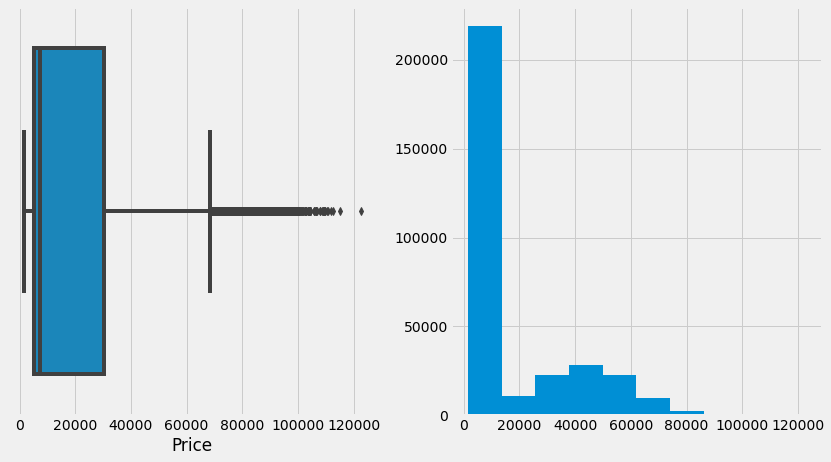

In [144]:
#Check the distribution of the Price column
fig,ax=plt.subplots(1,2,figsize=(13,7))
df["Price"].hist(ax=ax[1])
sns.boxplot(x=df['Price'],ax=ax[0])

###### We can observe that our price column show's right skewness we need to handle by using feature transformation techniques else it will impact on our model perfromance, most of the Flight price data is falling on Left side show's right skewness. also our price column has so many outliers we need to take care of that by using IQR method.

<AxesSubplot:xlabel='Airline'>

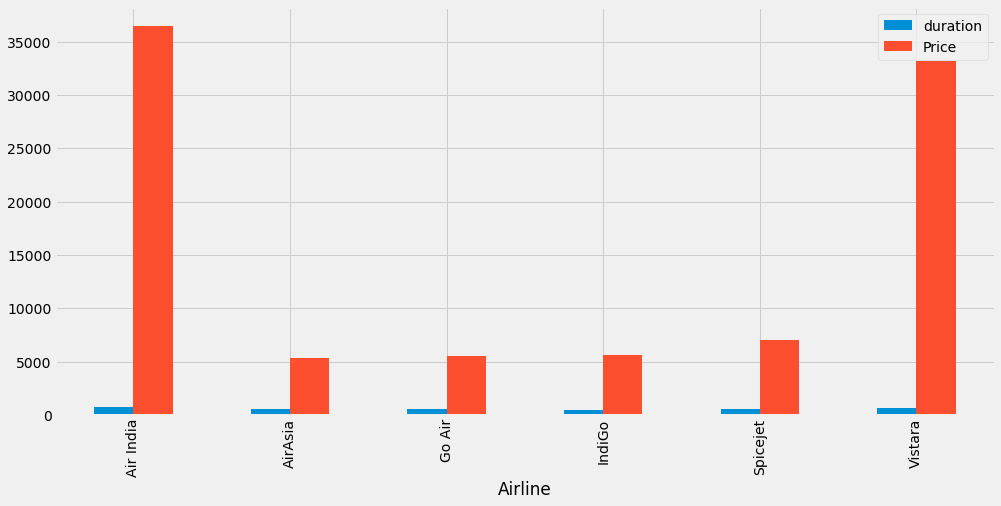

In [145]:
#Whcih airline takes high duration with respect to the price
ddr=df.groupby("Airline")[["duration","Price"]].mean()
ddr.plot.bar(figsize=(15,7))

In [146]:
df.columns

Index(['Price', 'Optimal_hr', 'Airline', 'Cabin', 'Dept_date', 'Dept_month',
       'stops', 'duration', 'weekday', 'dept_hours', 'Dept_flights_time',
       'No_of_Airlines_used', 'connecting_flight_Airline'],
      dtype='object')

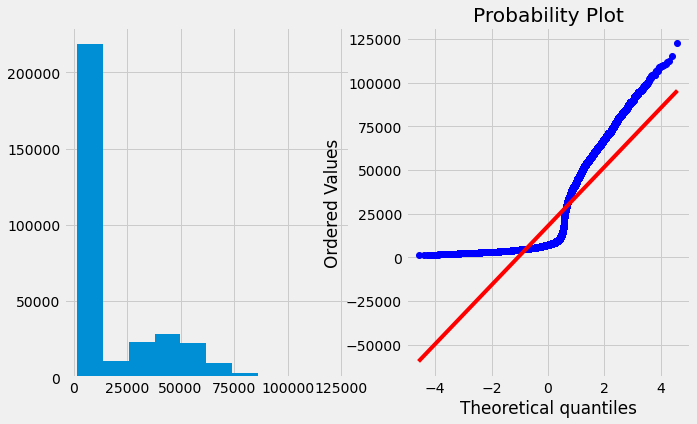

In [147]:
#Feature transformation on the Price column since it has so many outliers we need to handle that
df_2=df1.copy()
import scipy.stats as stat
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()
plot_data(df_2,"Price")

##### Box plot handles the outliers in the "Price" column effiecently so we can proceed that these transformation.

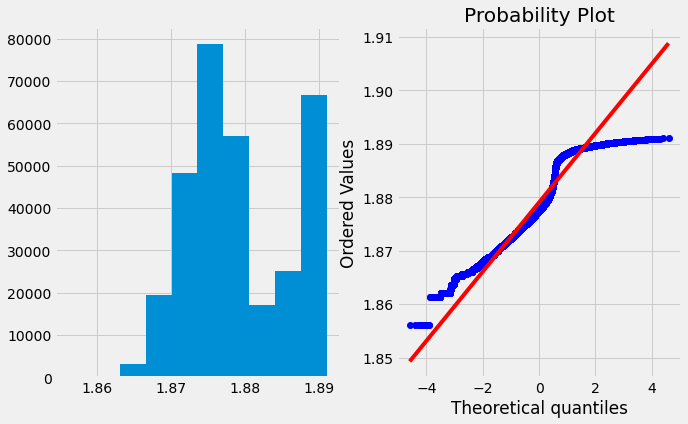

In [148]:
df_2["Price"],para=stats.boxcox(df_2["Price"])
plot_data(df_2,"Price")

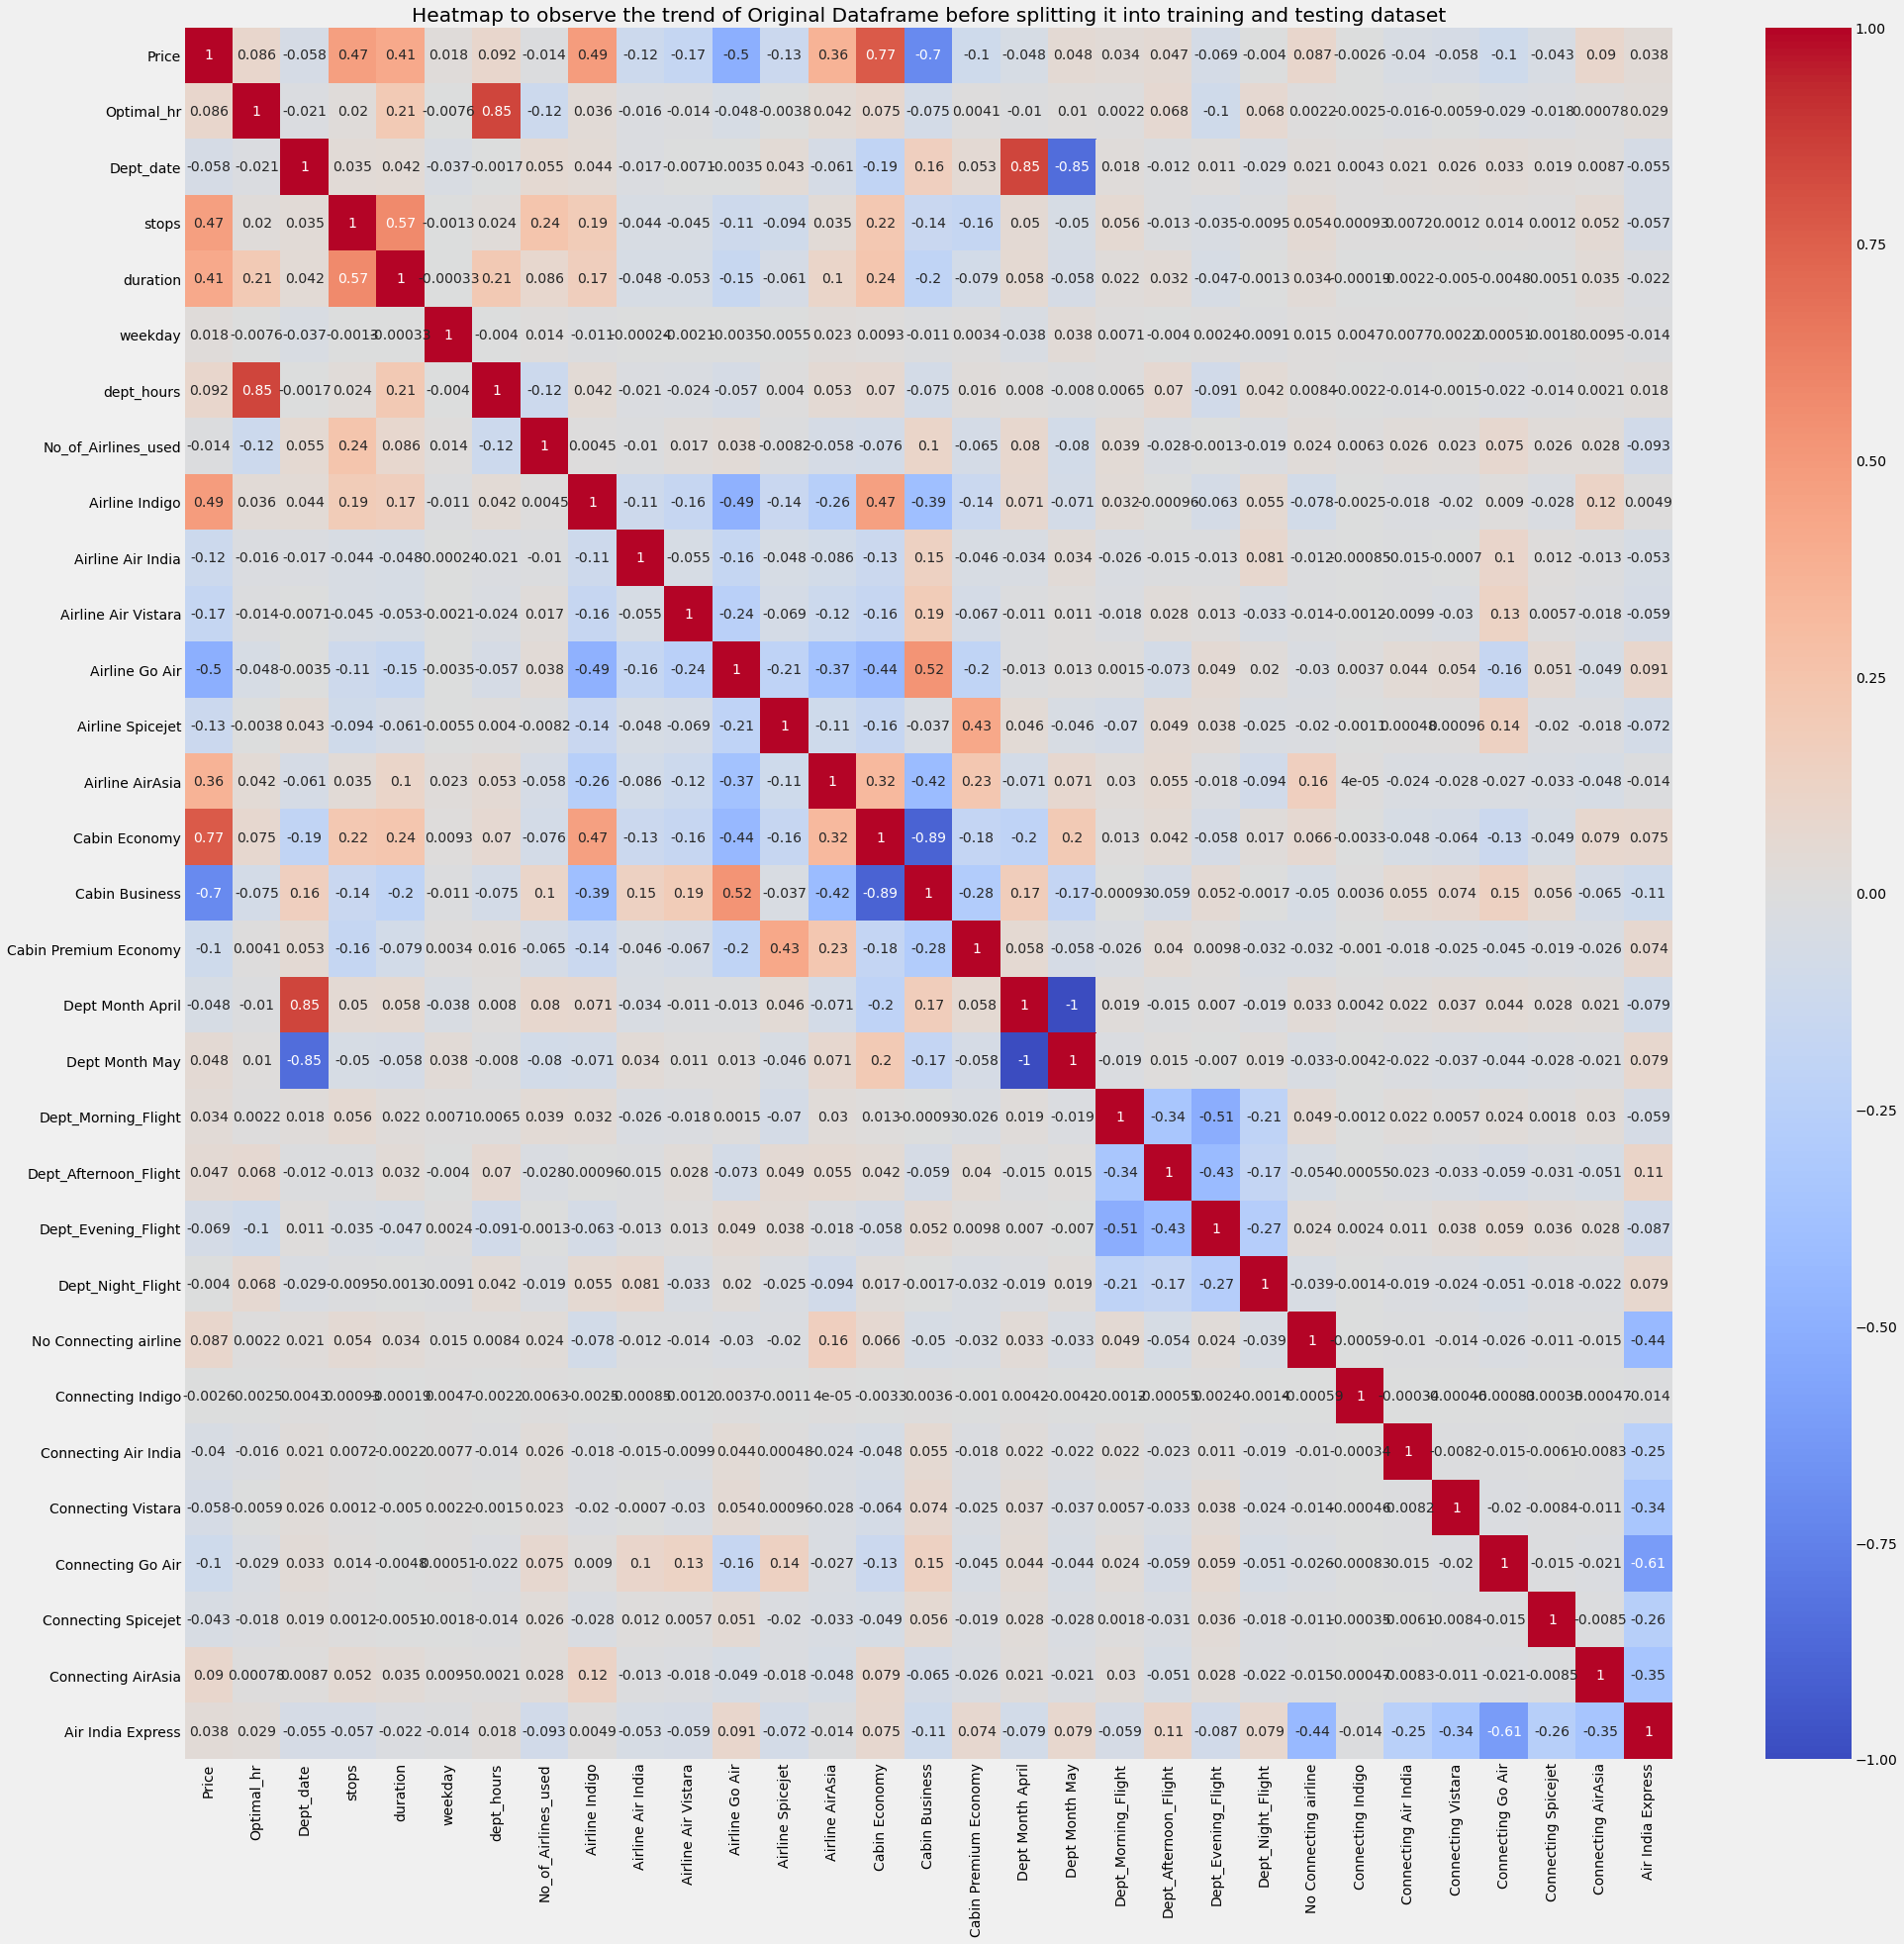

In [149]:

#create heatmap
#df1 = df.drop(columns=["Airline","Cabin","Dept_city", "Dept_month", "arrival_city", "layover_cities", "Departure_Date", "Arrival_Date", "day_name", "Dept_flights_time", "arrival_flights_time"], axis= 1)


plt.figure(figsize=(30,30))
#cmap = sns.cubehelix_palette(as_cmap=True)

res = sns.heatmap(df1.corr(), cmap = "coolwarm" ,annot=True)
plt.title("Heatmap to observe the trend of Original Dataframe before splitting it into training and testing dataset")
plt.show() 

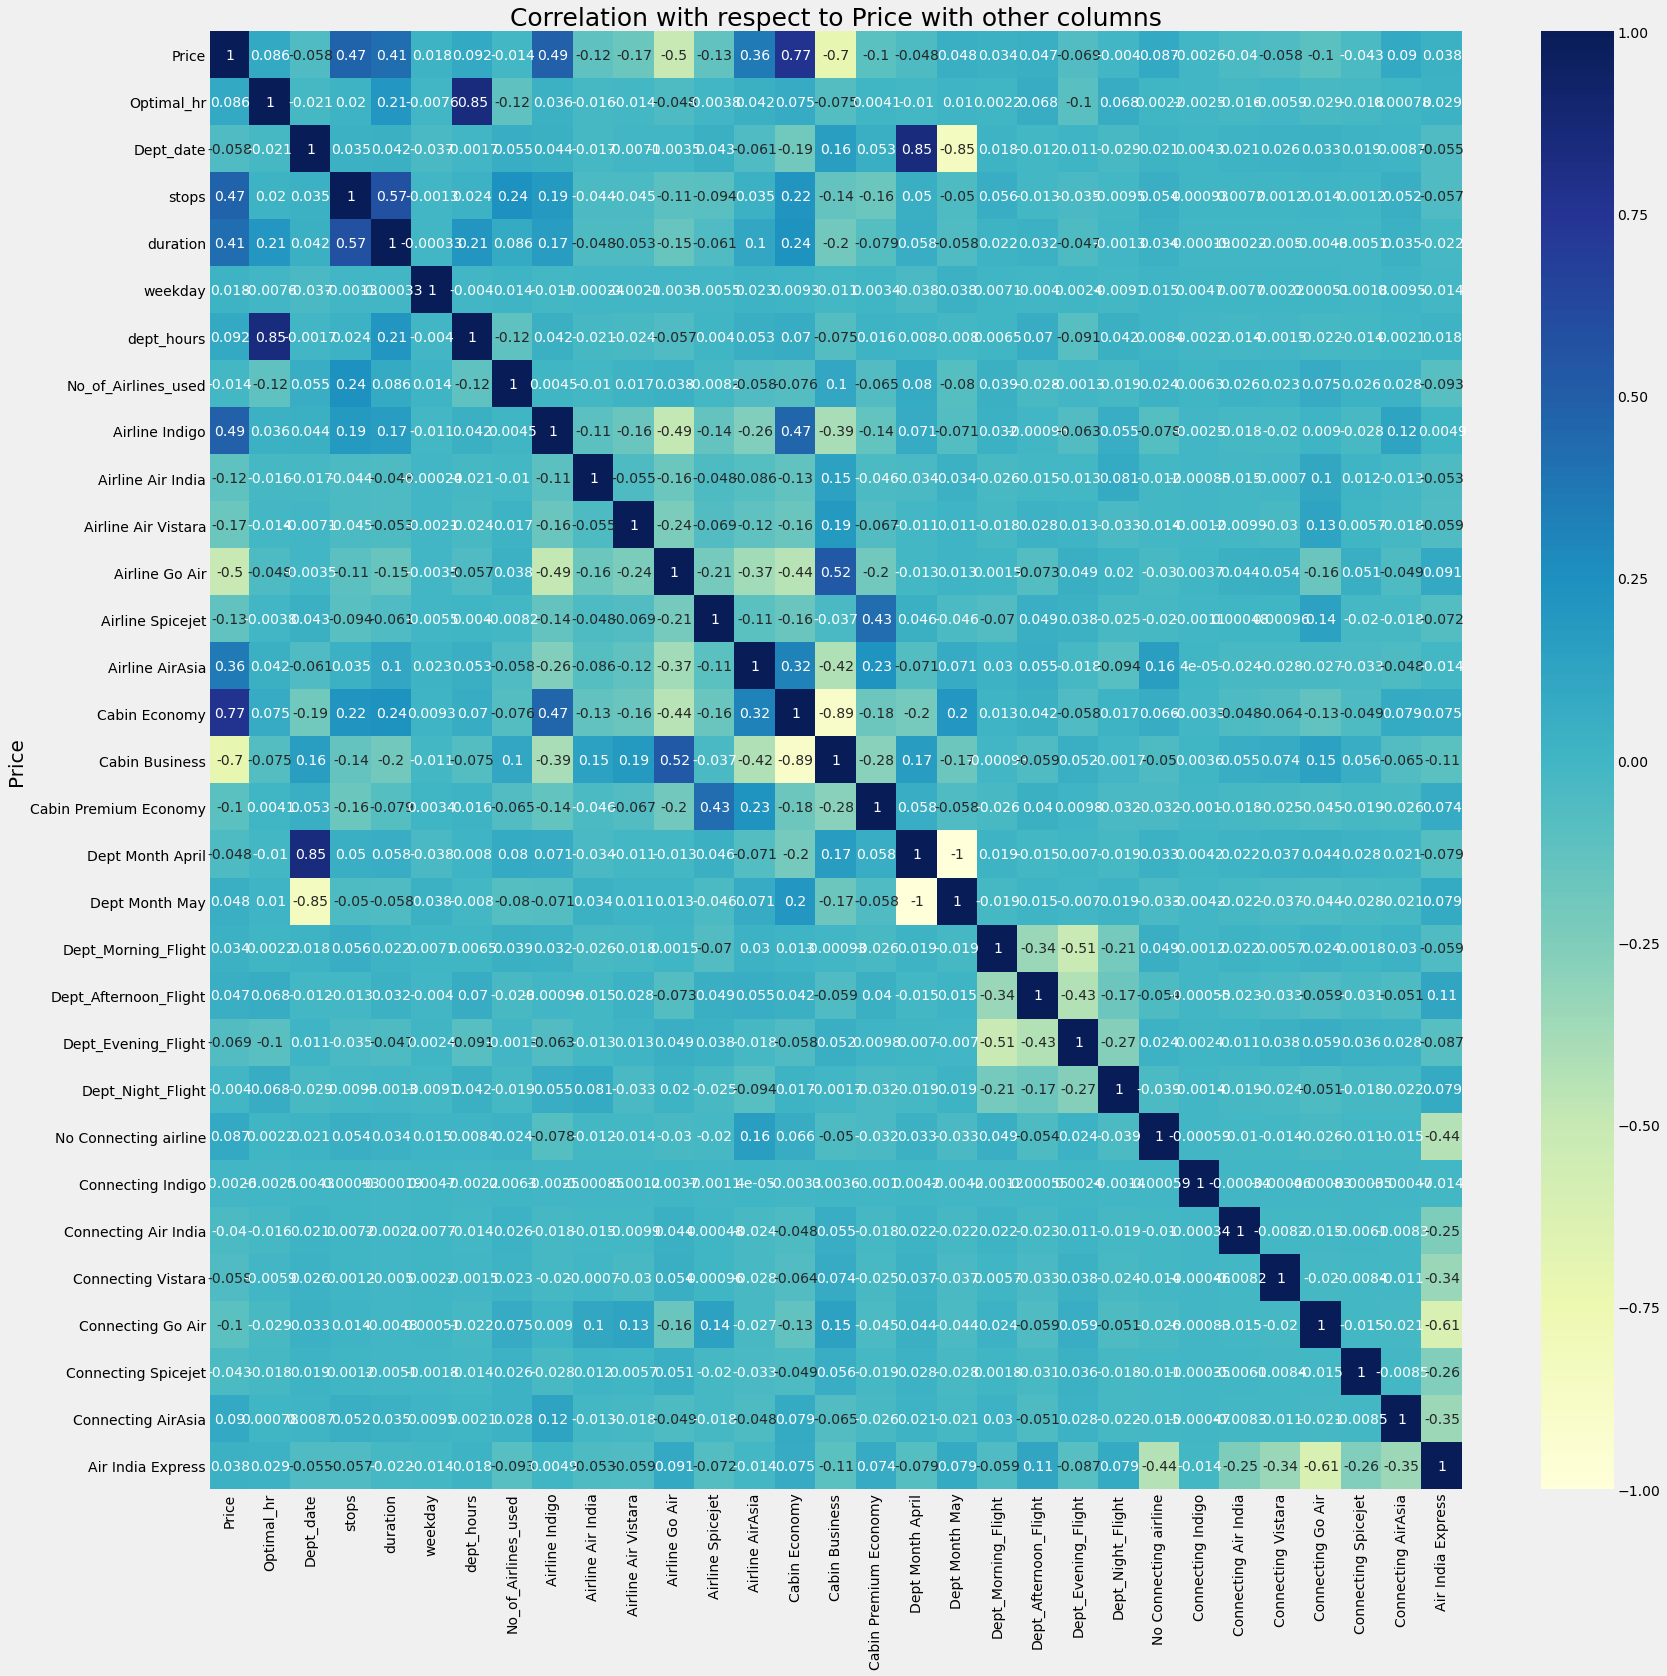

In [150]:

# set heatmap size
plt.figure(figsize= (25,25)) 
 
# create heatmap seaborn
 
cbar_kws = {"orientation":"vertical", 
            "shrink":1,
            'extend':'min', 
            'extendfrac':0.1, 
            "ticks":np.arange(0,22), 
            "drawedges":True,
           } # color bar keyword arguments
 
sns.heatmap(df1.corr(), cmap= "YlGnBu", annot = True)
 
plt.title("Correlation with respect to Price with other columns", fontsize = 25)
plt.ylabel("Price", fontsize = 20)
plt.show()



<AxesSubplot:>

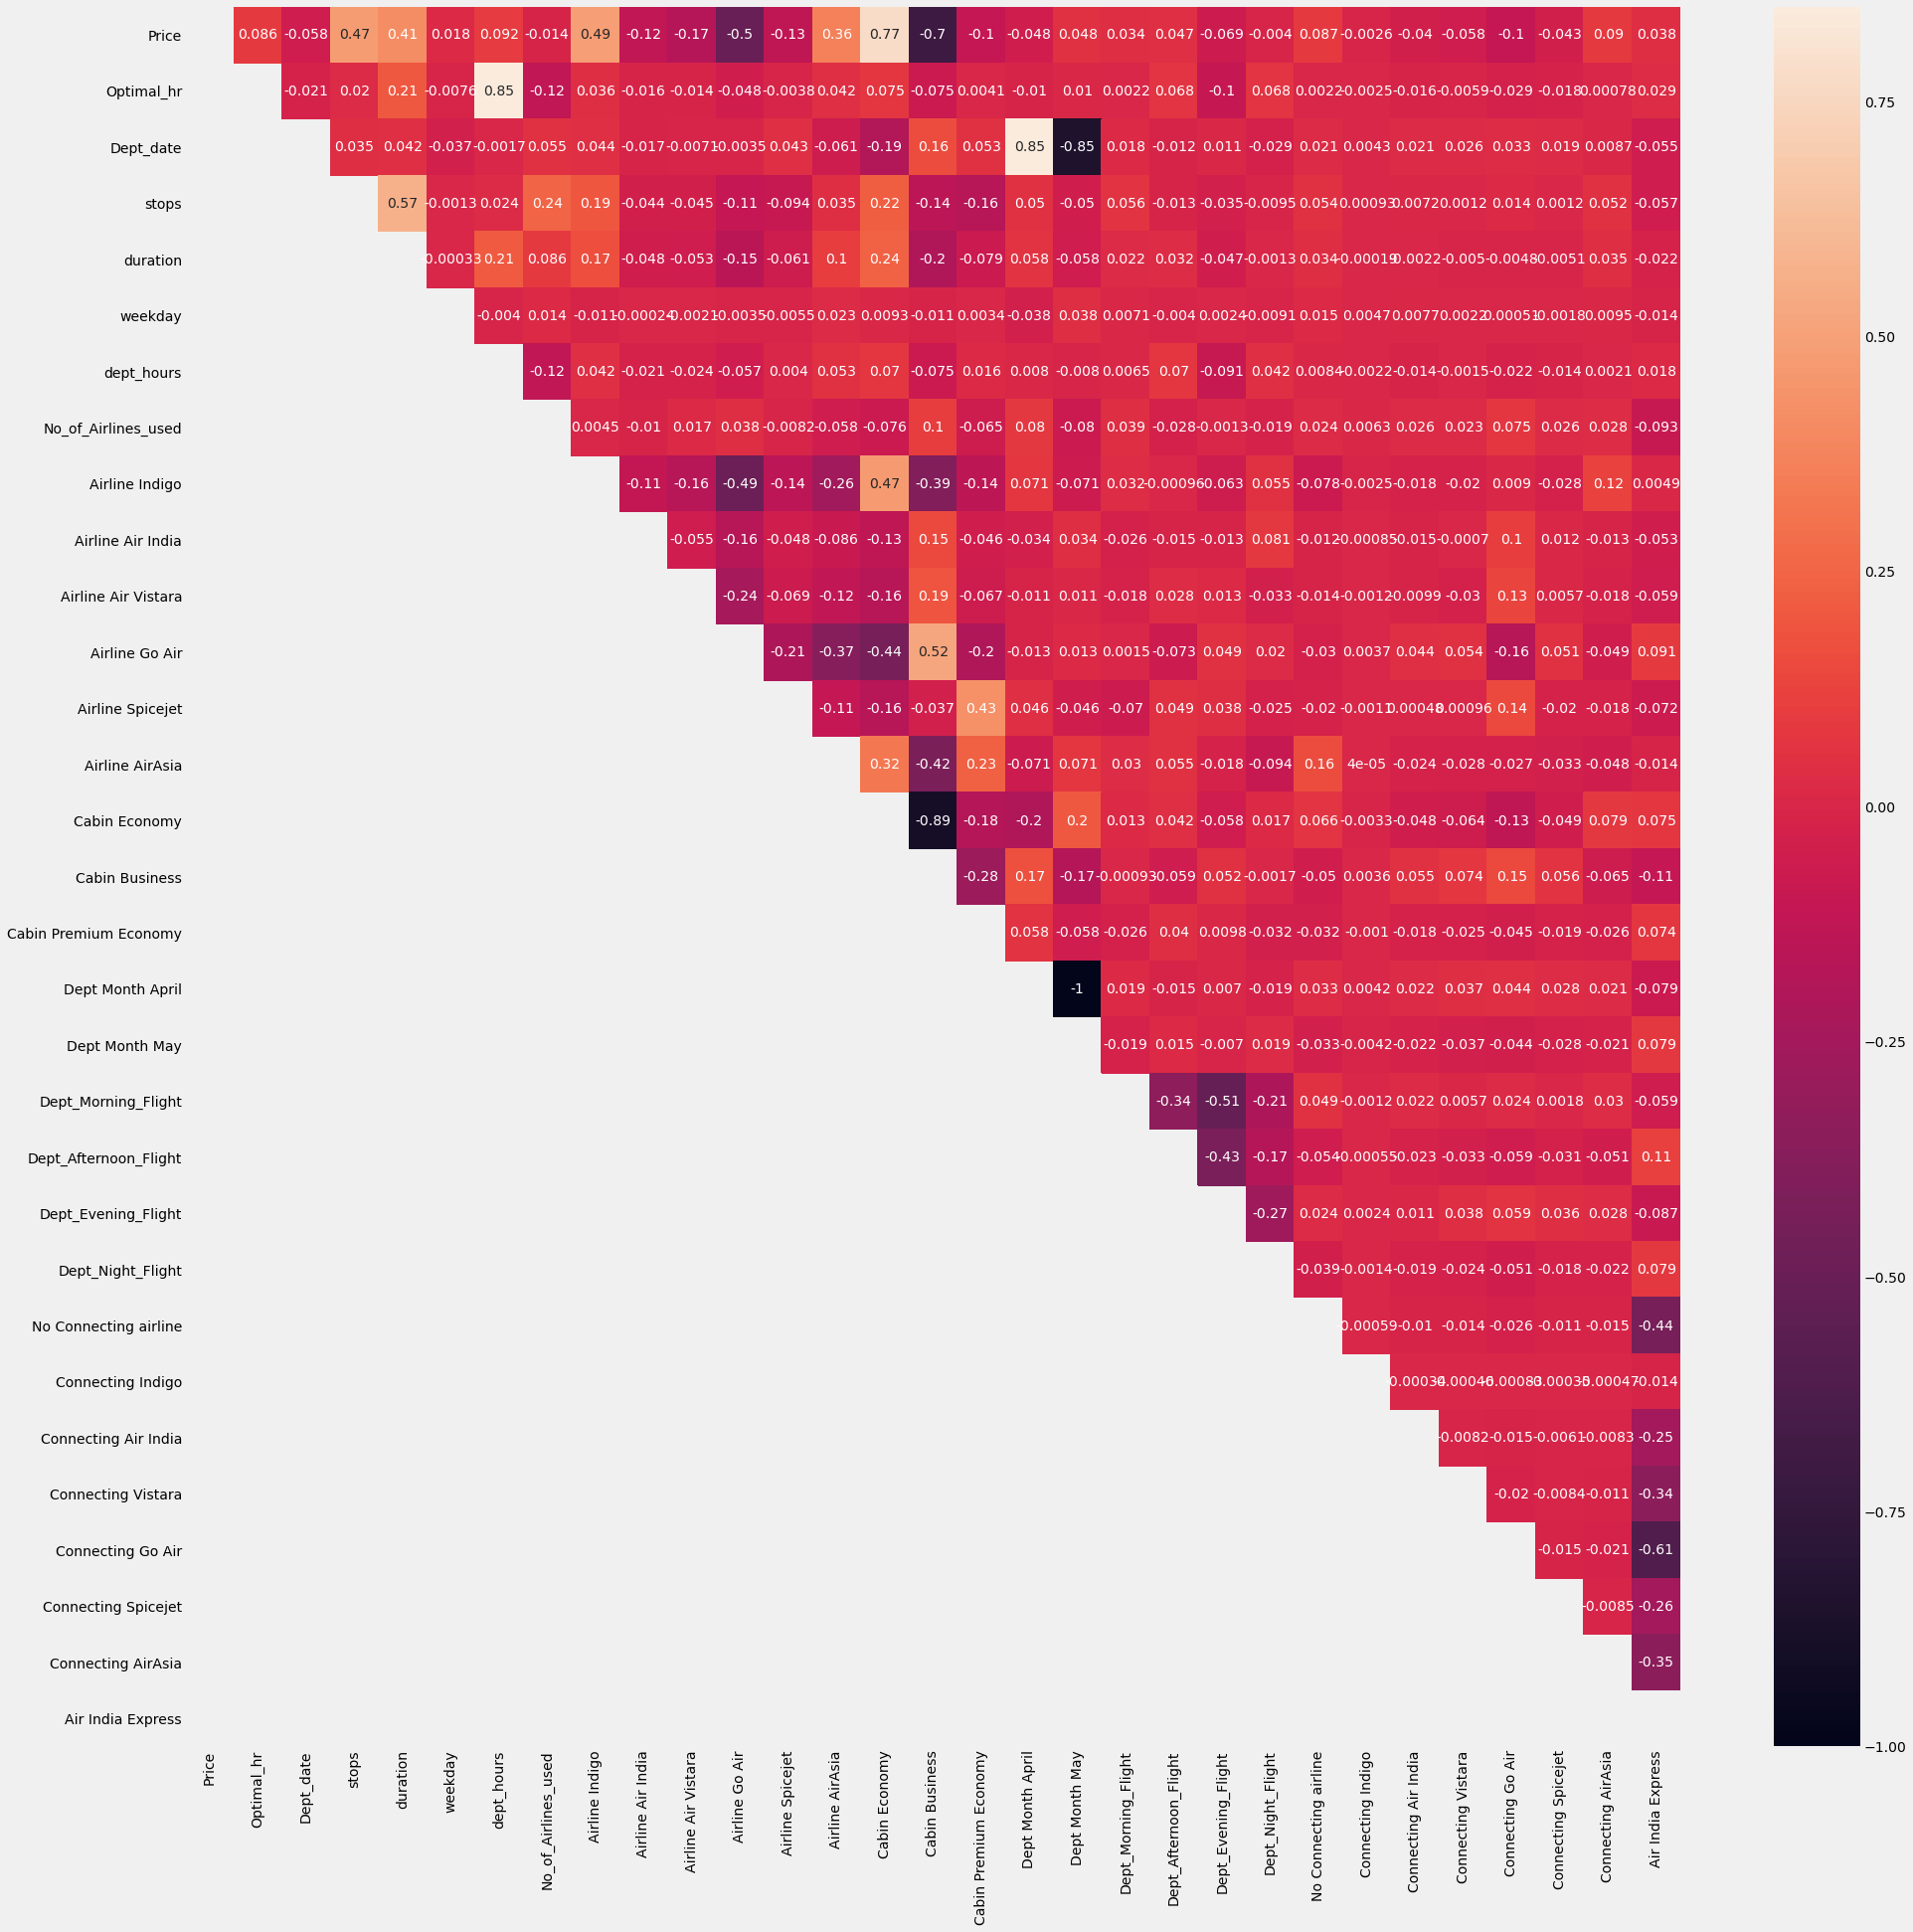

In [151]:
# Upper triangle heatmap
 
plt.figure(figsize=(30,30))
 
corr_mx = df1.corr() # correlation matrix
 
matrix = np.tril(corr_mx) # take lower correlation matrix
 
sns.heatmap(corr_mx, mask=matrix, annot=True)

<AxesSubplot:>

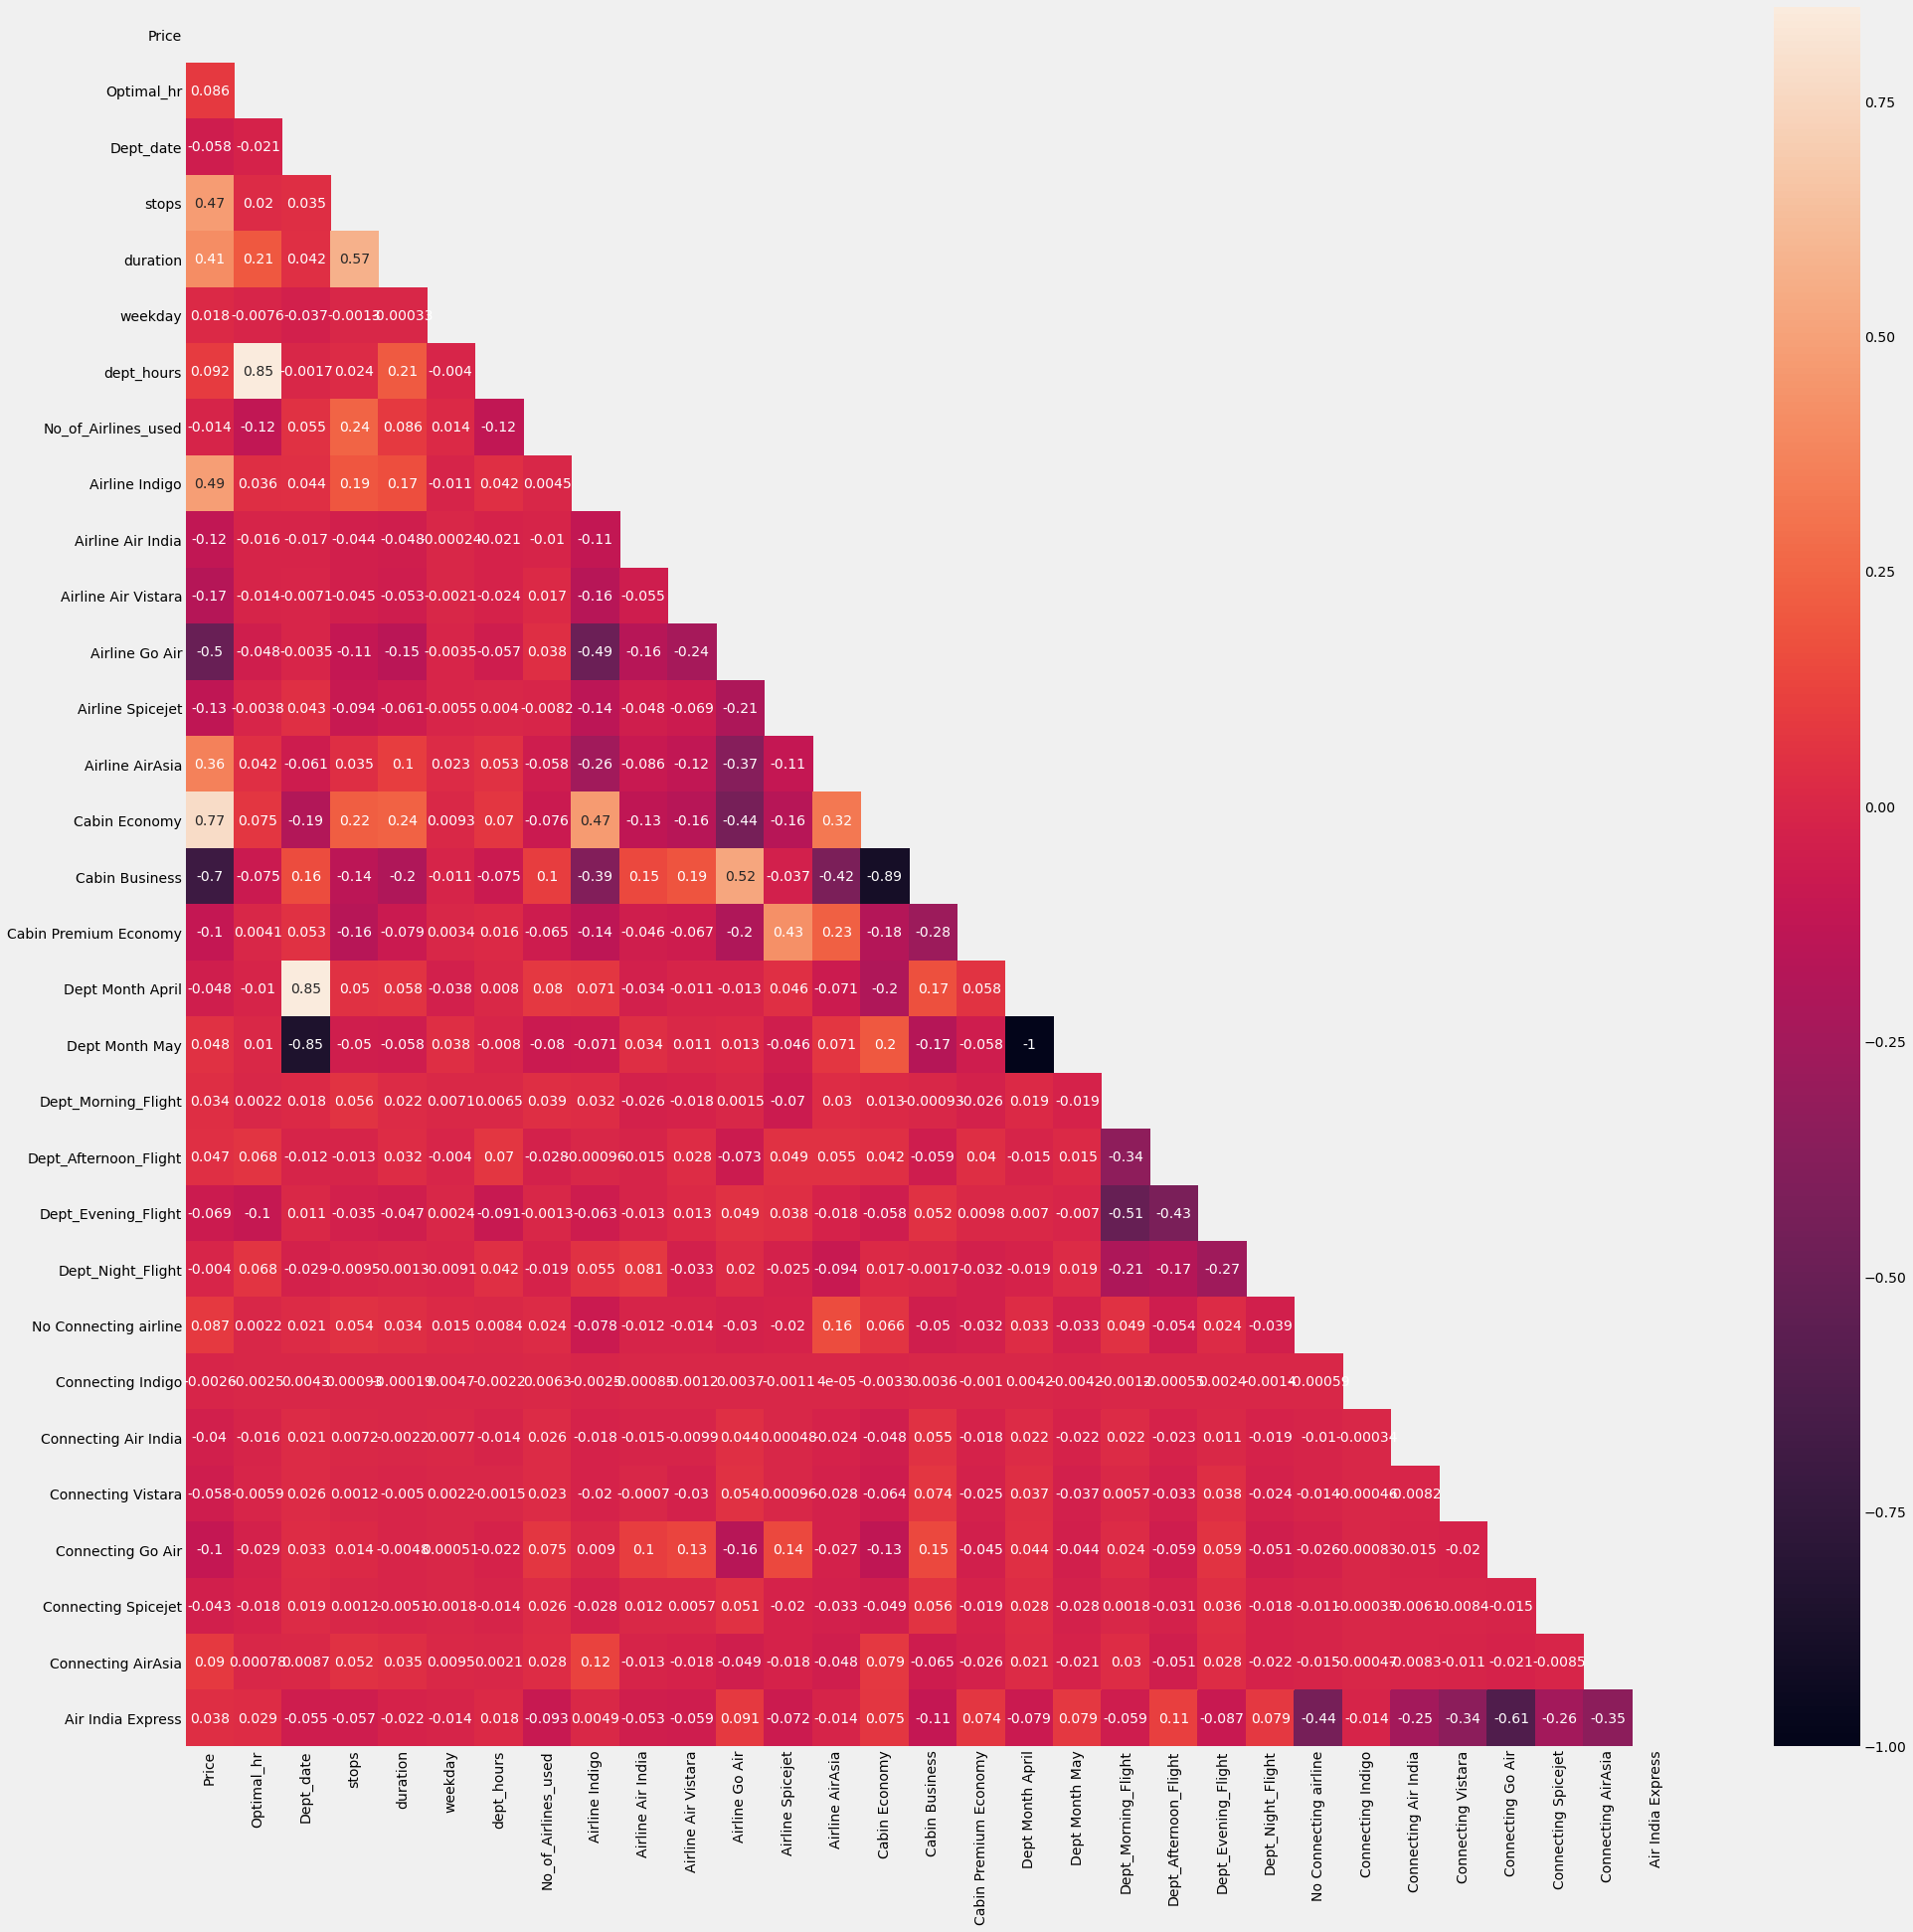

In [152]:
# Lower triangle heatmap
 
plt.figure(figsize=(30,30))
 
corr_mx = df1.corr() # correlation matrix
 
matrix = np.triu(corr_mx) # take upper correlation matrix
 
sns.heatmap(corr_mx, mask=matrix, annot=True)

<Figure size 1440x1080 with 0 Axes>

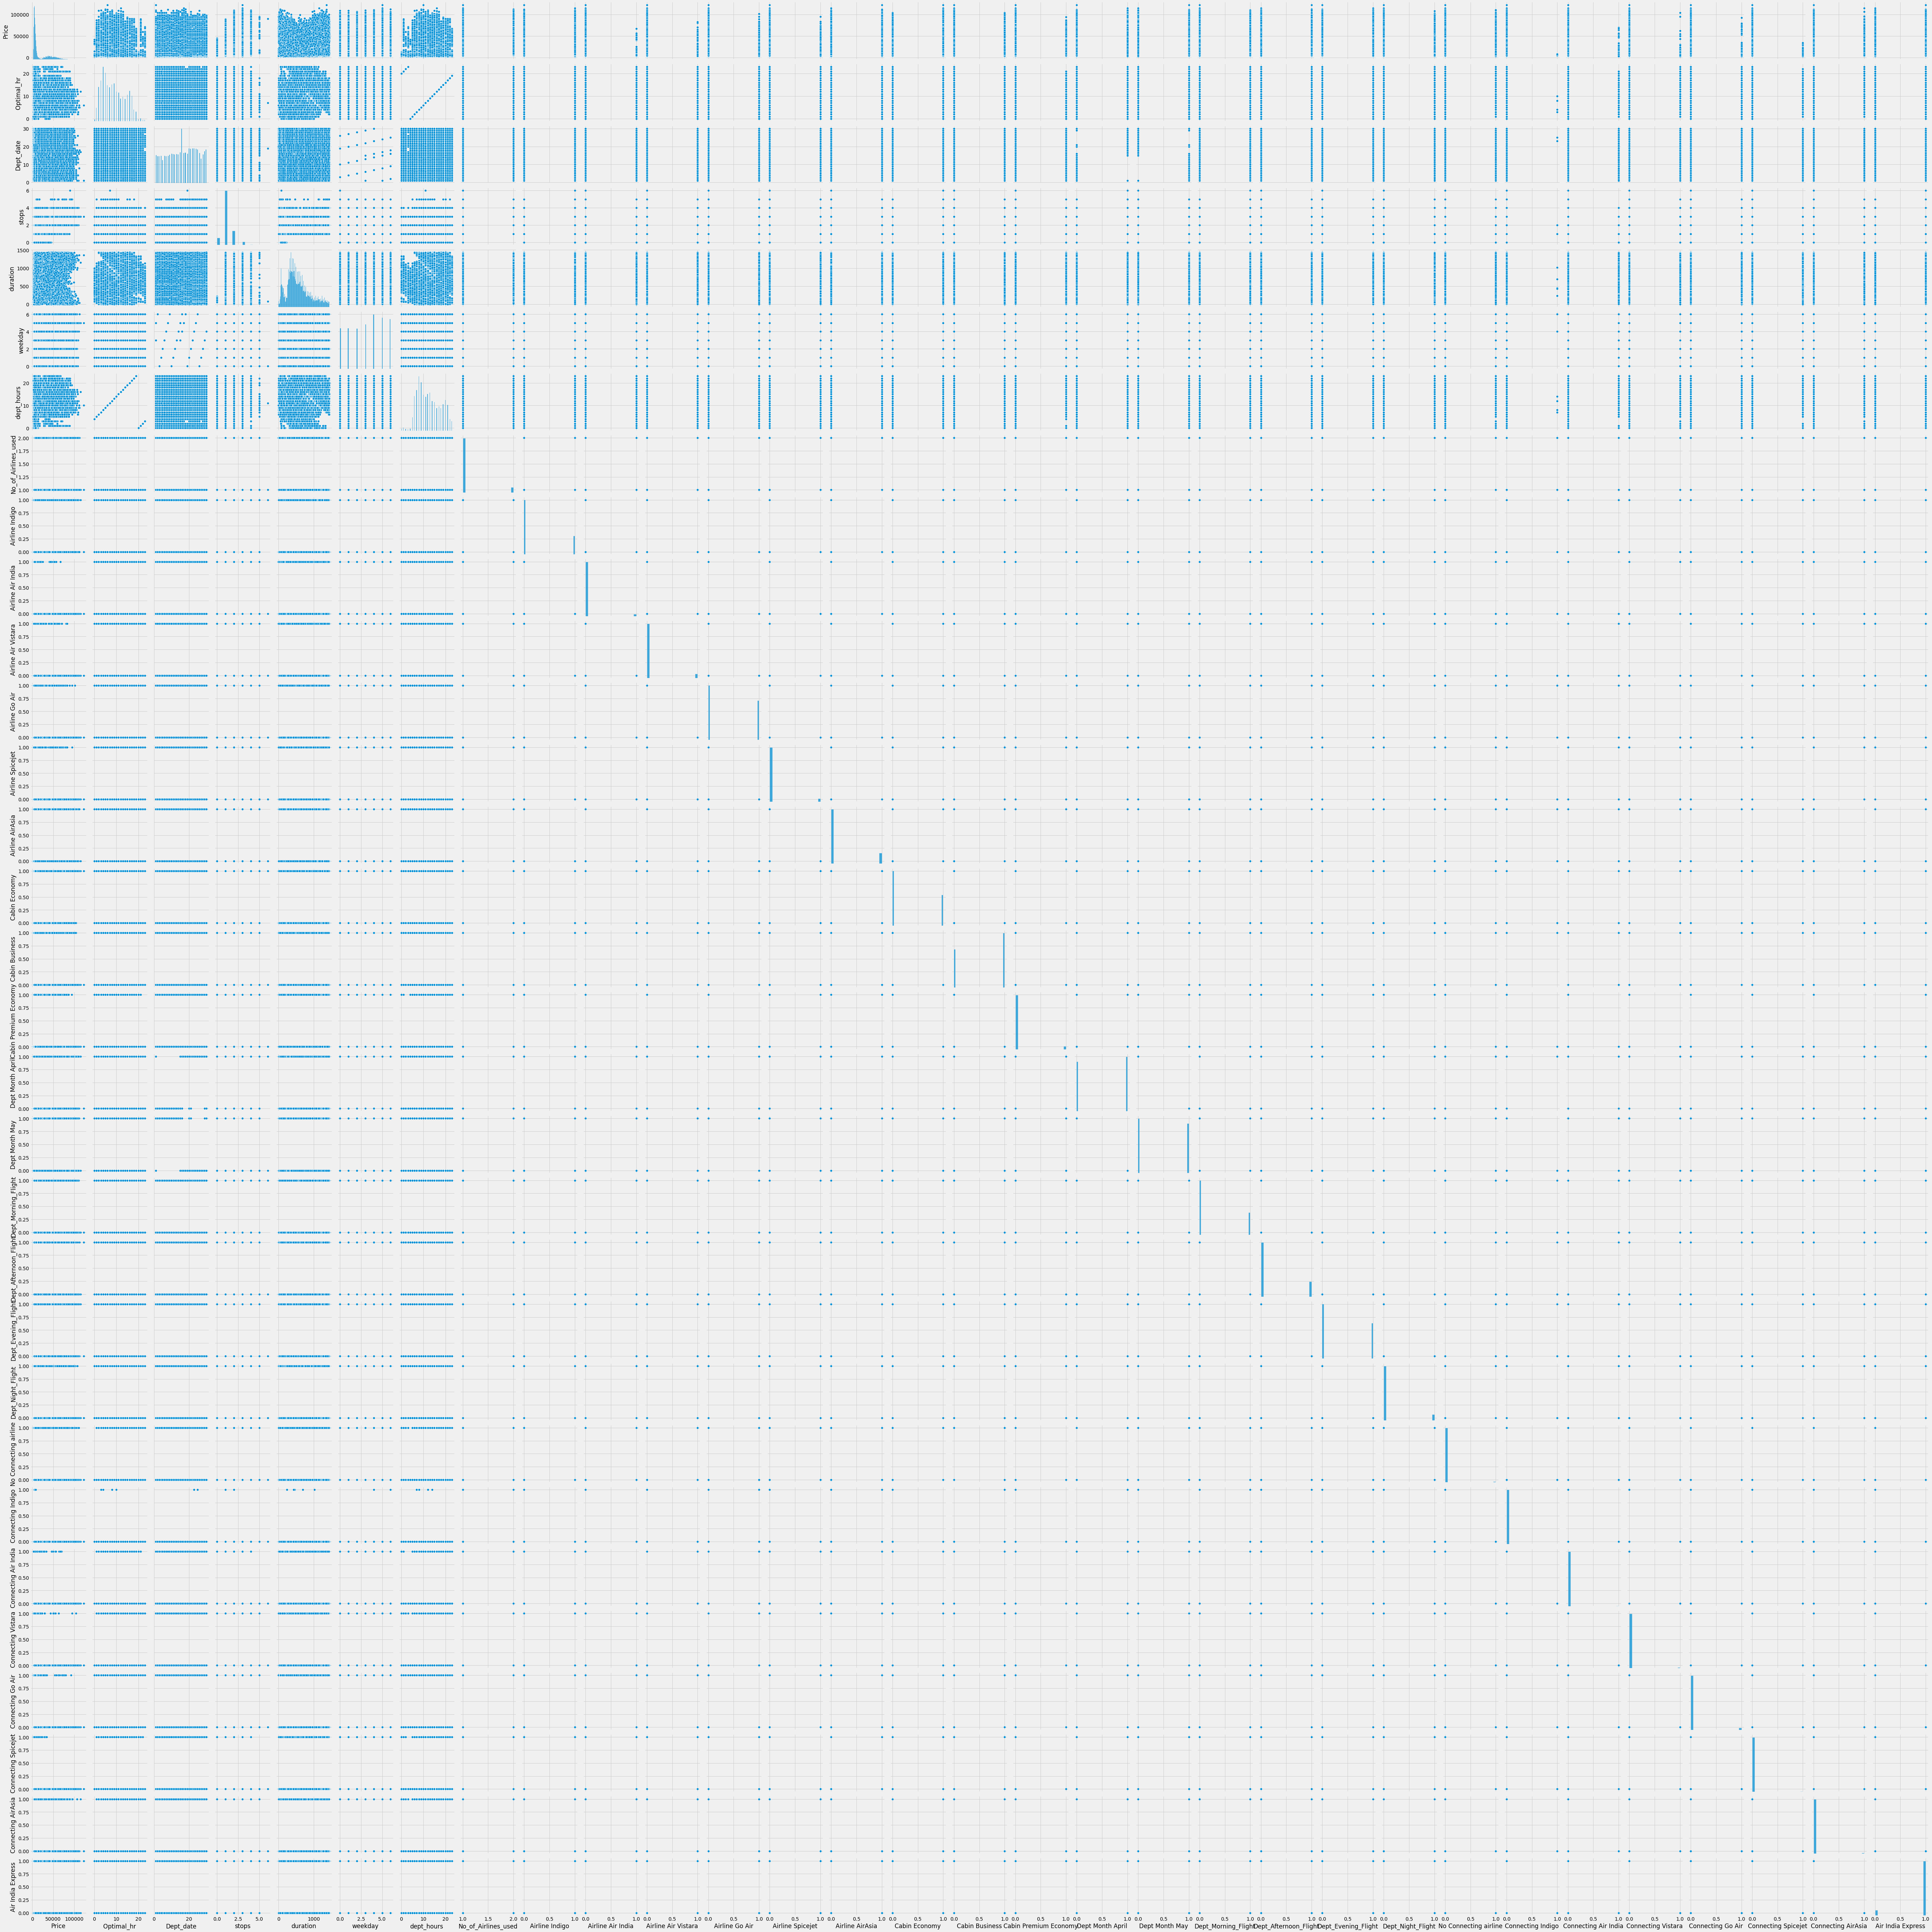

In [153]:
#Pair Plot
 
plt.figure(figsize=(20,15))
sns.pairplot(data=df1)
plt.show()

<Figure size 1152x648 with 0 Axes>

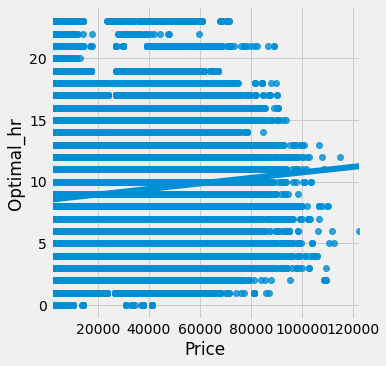

In [154]:
#lmplot
plt.figure(figsize=(16,9))
sns.lmplot(x='Price', y='Optimal_hr', data=df1)
plt.show()

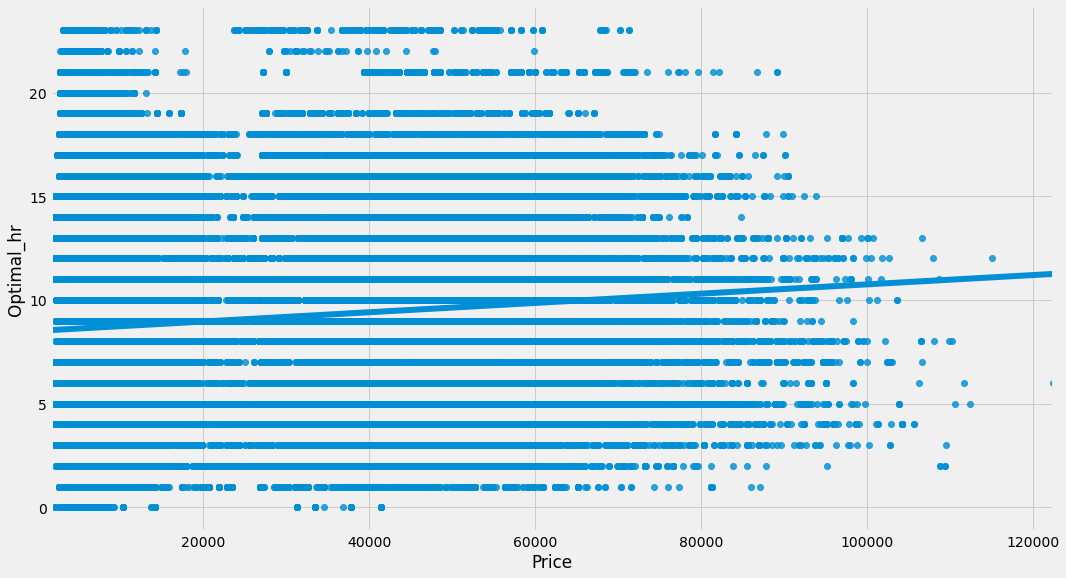

In [155]:
#regplot
plt.figure(figsize=(16,9))
sns.regplot(x='Price', y='Optimal_hr', data=df1)
plt.show()

#### As we can see, the variables showing True is essential for the model, and the False variable is not needed. If we want to add the False variable to the model, there is also a rank associated with them to add the variables in that order.

#### Splitting the Dataset into Training and Testing parts and selecting XGBoost Model to find the R-score so that can observe whether this model plays an important role or not.

In [156]:
X = df1.iloc[:, 1:]
y = df1.iloc[:, 0]

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = True)

In [158]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [159]:
y_predict = xgb.predict(X_test)

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


In [160]:
R2 = r2_score(y_test,y_predict)
print("R square: ",R2*100)

R square:  92.53104793662098


In [161]:
xgb.feature_importances_


array([1.8513236e-03, 3.3354689e-03, 7.3236391e-02, 6.2332680e-03,
       1.3607298e-03, 2.3119936e-03, 3.1041664e-03, 3.6004288e-03,
       3.1627662e-02, 1.2749125e-01, 2.8899989e-01, 3.7642490e-02,
       2.8590427e-03, 3.8828602e-01, 6.3793235e-03, 4.7755704e-04,
       3.0950648e-03, 0.0000000e+00, 1.5556077e-03, 7.0460181e-04,
       1.2680291e-03, 1.4053816e-03, 7.7434588e-04, 0.0000000e+00,
       1.4098627e-03, 9.0055534e-04, 7.8001493e-03, 9.1371749e-04,
       3.7496834e-04, 1.0007089e-03], dtype=float32)

FixedFormatter should only be used together with FixedLocator


<Figure size 2160x2160 with 0 Axes>

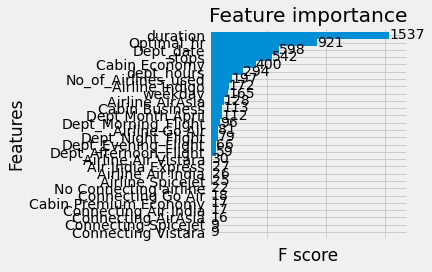

In [162]:
plt.figure(figsize = (30, 30))
ax = plot_importance(xgb, height = 1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")  #it will rotate text on x axis
plt.tight_layout()
plt.show()

###### From the above plot, we can clearly observe the "features" that plays an important role for our data are:
1. Duration
2. Optimal Hour
3. Departure Date
4. Stops
5. Cabin Economy
6. Departure Hours
7. No. of Airlines Used

#### Feature Importance Computed with SHAP Values


In [163]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


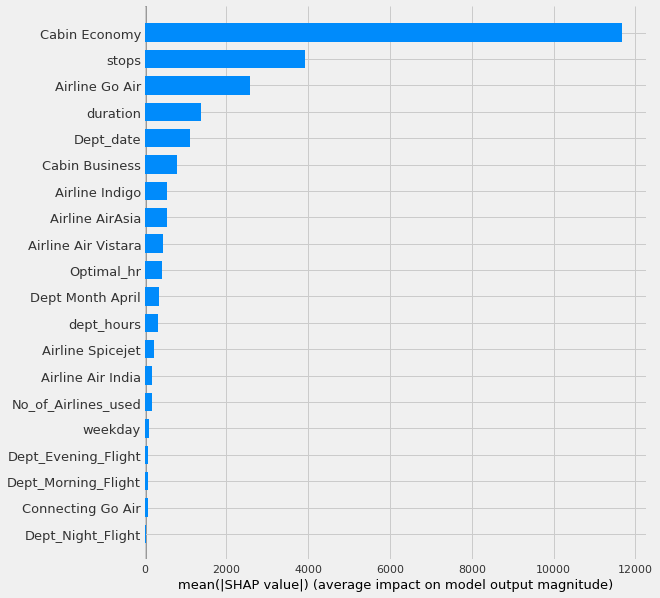

In [164]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


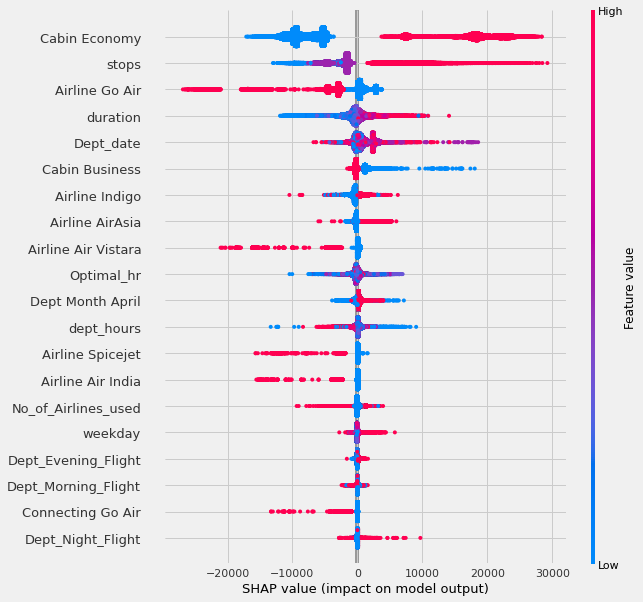

In [165]:
shap.summary_plot(shap_values, X_test)